# **Maestría en Inteligencia Artificial Aplicada**

## **Inteligencia Artificial y Aprendizaje Automático**

### Tecnológico de Monterrey

### Prof Luis Eduardo Falcón Morales

## **Actividad 9: Modelos de predicción con modelos recurrentes**

### Javier Rebull
### A01795838


# Objetivo:
##### El desarrollo de esta actividad contribuye al cumplimiento de los objetivos del tema de Aprendizaje Profundo, modelos Secuenciales o Recurrentes y Series de Tiempo.


# **Introducción**

En esta actividad, hemos seleccionado las acciones de **Apple Inc. (AAPL)** para nuestro análisis de series de tiempo y predicción utilizando modelos recurrentes. Elegimos Apple porque es una de las empresas más valiosas y reconocidas a nivel mundial. Fundada en 1976, Apple ha revolucionado la industria tecnológica con productos innovadores como el iPhone, iPad y MacBook, y ha mantenido una trayectoria de crecimiento sostenido en su valor de mercado.

## **Valoración actual y proyecciones futuras**

A octubre de 2023, Apple continúa siendo una de las compañías con mayor capitalización bursátil en el mundo, superando los **2 billones de dólares**. Su sólida posición financiera y su capacidad para innovar constantemente la han posicionado como líder en el sector tecnológico. Con el creciente enfoque en servicios como Apple Music, Apple TV+ y la expansión en áreas como inteligencia artificial y realidad aumentada, los analistas proyectan que Apple seguirá experimentando un crecimiento significativo en el futuro. Estas proyecciones positivas hacen que sus acciones sean de gran interés para inversores y analistas financieros.

## **Obtención de datos y variables utilizadas**

Para llevar a cabo nuestro análisis, descargamos los datos históricos del precio de las acciones de Apple utilizando la biblioteca `yfinance`, que nos permite acceder fácilmente a información financiera desde Yahoo Finance. Nos enfocamos en los datos de los últimos cinco años para obtener una perspectiva actual y relevante del comportamiento de las acciones.

## En este estudio, utilizamos dos variables clave:

1. **Fecha (`Date` o `ds`):** Representa la fecha correspondiente a cada registro del precio de la acción. Esta variable es esencial para el análisis de series de tiempo, ya que nos permite ordenar cronológicamente los datos y detectar tendencias, patrones estacionales y ciclos en el comportamiento de la acción.

2. **Precio de Cierre Ajustado (`Adj Close` o `y`):** Este valor refleja el precio de cierre de la acción ajustado por eventos corporativos como dividendos, divisiones de acciones (splits) o emisiones de derechos. El **Precio de Cierre Ajustado** proporciona una visión más precisa del rendimiento histórico de la acción, ya que incorpora los ajustes necesarios para reflejar el valor real que un inversor habría obtenido si hubiera mantenido la acción durante ese período. Al utilizar esta variable, eliminamos distorsiones causadas por eventos corporativos y nos enfocamos en las variaciones genuinas del mercado.

Al analizar estas variables, buscamos construir modelos predictivos que nos permitan comprender y anticipar el comportamiento futuro de las acciones de Apple, aprovechando técnicas de aprendizaje automático y análisis de series de tiempo.

---

# **0 - Preparando los datos**

In [1]:
# Omitamos los Warnings por el momento:
import warnings
warnings.filterwarnings("ignore")

from statsmodels.tools.sm_exceptions import ConvergenceWarning

# Ignorar específicamente los warnings de convergencia de statsmodels
warnings.simplefilter("ignore", ConvergenceWarning)

In [2]:
#!pip freeze   # Si deseas verificar qué librerías y versiones ya tiene google-Colab preinstaladas,
               # en particular "prophet" que usaremos en este ejercicio.

In [3]:
# Manipulación y Análisis de Datos
import numpy as np     # Librería para cálculos numéricos y científicos en Python, especialmente útil para trabajar con arreglos y matrices.
import pandas as pd    # Librería para manipulación y análisis de datos, permite trabajar con estructuras como DataFrames para organizar y limpiar datos.

# Visualización de Datos
import matplotlib.pyplot as plt    # Módulo de visualización que permite generar gráficos de líneas, dispersión, barras, etc., para interpretar los datos.
import matplotlib.dates as mdates

# Evaluación de Modelos
from sklearn.preprocessing import MinMaxScaler  # Escala los datos para normalizarlos en un rango específico, útil para modelos que requieren datos en escalas similares.
from sklearn.metrics import mean_squared_error  # Métrica para evaluar modelos de regresión, calcula el error cuadrático medio entre valores reales y predicciones.
import math  # Módulo estándar de matemáticas, proporciona funciones básicas como sqrt, sin, cos, etc., para cálculos aritméticos complementarios.

# Modelado de Series Temporales
from prophet import Prophet  # Librería de Facebook para modelado de series temporales con tendencia y estacionalidad, simplifica la predicción de series temporales.
from statsmodels.tsa.arima.model import ARIMA  # Para realizar pronósticos con modelos ARIMA y SARIMA, útiles en series temporales.

# Gráficos y Análisis de Series Temporales con Statsmodels
from statsmodels.graphics.tsaplots import month_plot, quarter_plot  # Funciones para visualizar patrones estacionales mensuales y trimestrales en datos temporales.
from statsmodels.tsa.seasonal import seasonal_decompose  # Descompone series temporales en tendencia, estacionalidad y residuales para entender patrones subyacentes.
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  # Gráficos de autocorrelación (ACF) y autocorrelación parcial (PACF) para analizar la dependencia en diferentes rezagos.

# Obtención de Datos Financieros
import yfinance as yf  # Biblioteca para descargar datos financieros históricos (acciones, divisas, etc.) desde Yahoo Finance, útil para análisis financiero.

# Trabajar con Días Hábiles de EE.UU.
from pandas.tseries.holiday import USFederalHolidayCalendar  # Para trabajar con calendarios que excluyen días festivos en EE.UU.
from pandas.tseries.offsets import CustomBusinessDay  # Define días hábiles personalizados para ajustar los análisis de series temporales.

# Modelado con Redes Neuronales (LSTM)
import tensorflow as tf  # Biblioteca de aprendizaje automático utilizada para construir y entrenar redes neuronales.
from tensorflow.keras.models import Sequential  # Permite construir modelos de redes neuronales secuenciales.
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization  # Capas de LSTM, Dense, Dropout y BatchNormalization para construir modelos LSTM.

# **Obteniendo información de Yahoo Finance**

In [4]:
ticker_symbol = 'AAPL'   # selecciona las iniciales de la compañía deseada.
data = yf.download(ticker_symbol, period='5y')   # Se indica el período y descargamos.
data.to_csv('historical_data.csv')   # Guardamos los datos

[*********************100%***********************]  1 of 1 completed


In [5]:
path = 'historical_data.csv'
df = pd.read_csv(path, header=0)
df.head()

,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-11-13 00:00:00+00:00,64.09976959228516,66.11750030517578,66.19499969482422,65.26750183105469,65.28250122070312,102734400
3,2019-11-14 00:00:00+00:00,63.65621566772461,65.66000366210938,66.22000122070312,65.5250015258789,65.9375,89182800
4,2019-11-15 00:00:00+00:00,64.41240692138672,66.44000244140625,66.44499969482422,65.75250244140625,65.91999816894531,100206400


In [6]:
df.info()   # La columna que nos interesa Adj Close y Date

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1260 non-null   object
 1   Adj Close  1259 non-null   object
 2   Close      1259 non-null   object
 3   High       1259 non-null   object
 4   Low        1259 non-null   object
 5   Open       1259 non-null   object
 6   Volume     1259 non-null   object
dtypes: object(7)
memory usage: 69.0+ KB


In [7]:
print(df.columns) #Obteniendo las columnas del DataFrame

Index(['Price', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


In [8]:
# Reseteamos el índice para obtener 'Date' como columna
data = data.reset_index()

# Seleccionamos las columnas 'Date' y 'Adj Close'
df = data[['Date', 'Adj Close']]

print(df.columns) #Obteniendo las columnas del DataFrame Nuevamente

MultiIndex([(     'Date',     ''),
            ('Adj Close', 'AAPL')],
           names=['Price', 'Ticker'])


In [9]:
# Renombremos de manera estándar las columnas de fechas y valores de la
# serie de tiempo, donde además la fecha la trasnformamos a tipo datetime:

df.columns = ['ds', 'y']
df['ds']= pd.to_datetime(df['ds'])

df.head()

,ds,y
0,2019-11-13 00:00:00+00:00,64.099770
1,2019-11-14 00:00:00+00:00,63.656216
2,2019-11-15 00:00:00+00:00,64.412407
3,2019-11-18 00:00:00+00:00,64.737198
4,2019-11-19 00:00:00+00:00,64.540878


In [10]:
df.columns = ['ds', 'y'] # Dejando Ahora solo dos columnas: 'Date (ds)' y 'Adj Close (y)'.

In [11]:
df['ds'] = pd.to_datetime(df['ds']).dt.tz_localize(None) #Convertir la columna 'ds' a datetime y eliminar la zona horaria:

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1258 non-null   datetime64[ns]
 1   y       1258 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.8 KB


In [13]:
# Mostrar los primeros registros del DataFrame
print(df.head())

          ds          y
0 2019-11-13  64.099770
1 2019-11-14  63.656216
2 2019-11-15  64.412407
3 2019-11-18  64.737198
4 2019-11-19  64.540878


In [14]:
# Mostrar los últimos registros del DataFrame
print(df.tail(20))

             ds           y
1238 2024-10-16  231.525269
1239 2024-10-17  231.894867
1240 2024-10-18  234.741730
1241 2024-10-21  236.220108
1242 2024-10-22  235.600800
1243 2024-10-23  230.506393
1244 2024-10-24  230.316620
1245 2024-10-25  231.155685
1246 2024-10-28  233.143494
1247 2024-10-29  233.413193
1248 2024-10-30  229.847122
1249 2024-10-31  225.661728
1250 2024-11-01  222.665024
1251 2024-11-04  221.766006
1252 2024-11-05  223.204422
1253 2024-11-06  222.475235
1254 2024-11-07  227.229996
1255 2024-11-08  226.960007
1256 2024-11-11  224.229996
1257 2024-11-12  224.229996


En particular datetime64[ns] nos ayuda a representar un rango de fechas muy amplio (del año 1678 al 2262) con precisión de nanosegundos.

### **Agreguemos los ajustes usuales en Series de tiempo:**

In [15]:
# Hagamos una copia del DataFrame df con índices temporales:
df_temp = df.copy()  # Crea una copia del DataFrame original 'df' y la asigna a 'df_temp'
df_temp.set_index('ds', inplace=True)  # Establece la columna 'ds' como índice del DataFrame 'df_temp'
df_temp  # Muestra el DataFrame 'df_temp' con el índice 'ds' establecido

,y
ds,
2019-11-13,64.099770
2019-11-14,63.656216
2019-11-15,64.412407
2019-11-18,64.737198
2019-11-19,64.540878
...,...
2024-11-06,222.475235
2024-11-07,227.229996
2024-11-08,226.960007


In [16]:
# Imprime la forma (número de filas y columnas) del DataFrame original
print(f"Shape of original DataFrame df: {df.shape}")

# Imprime la forma (número de filas y columnas) del DataFrame ajustado con días hábiles en EE.UU.
print(f"Shape of DataFrame df_temp (business days in the US): {df_temp.shape}")

Shape of original DataFrame df: (1258, 2)
Shape of DataFrame df_temp (business days in the US): (1258, 1)


https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html

In [17]:
# Ajustemos la frecuencia de los índices, para que el modelo tenga información del período en que
# se encuentran los datos:

df_temp.index  # Observamos que aquí todavía no se tiene información del argumento "freq"

DatetimeIndex(['2019-11-13', '2019-11-14', '2019-11-15', '2019-11-18',
               '2019-11-19', '2019-11-20', '2019-11-21', '2019-11-22',
               '2019-11-25', '2019-11-26',
               ...
               '2024-10-30', '2024-10-31', '2024-11-01', '2024-11-04',
               '2024-11-05', '2024-11-06', '2024-11-07', '2024-11-08',
               '2024-11-11', '2024-11-12'],
              dtype='datetime64[ns]', name='ds', length=1258, freq=None)

Para las opciones de "freq" ver la tabla que viene en esta liga:

https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

In [18]:
# Crear un calendario de días hábiles que excluya los días festivos de EE.UU.
us_business_days = CustomBusinessDay(calendar=USFederalHolidayCalendar())

# Cambiar la frecuencia del índice a días hábiles según el calendario de EE.UU.
df_temp = df_temp.asfreq(us_business_days, method='pad')  # 'pad' llena valores faltantes con el dato anterior

# Verificamos que el índice de df_temp esté configurado como un índice de fechas de días hábiles en EE.UU.
df_temp.index = pd.to_datetime(df_temp.index)  # Convertimos el índice en fechas

df_temp.index

DatetimeIndex(['2019-11-13', '2019-11-14', '2019-11-15', '2019-11-18',
               '2019-11-19', '2019-11-20', '2019-11-21', '2019-11-22',
               '2019-11-25', '2019-11-26',
               ...
               '2024-10-29', '2024-10-30', '2024-10-31', '2024-11-01',
               '2024-11-04', '2024-11-05', '2024-11-06', '2024-11-07',
               '2024-11-08', '2024-11-12'],
              dtype='datetime64[ns]', name='ds', length=1251, freq='C')

En este caso observamos que, freq='C' indica que el índice está usando una frecuencia de “CustomBusinessDay” (día hábil personalizado). Esto ocurre porque utilizamos CustomBusinessDay con un calendario específico de días hábiles (en este caso, los días laborables en EE.UU. que excluyen los festivos federales y fines de semana).

Esta frecuencia personalizada significa que:

	•	Solo se incluyen los días considerados hábiles según el calendario USFederalHolidayCalendar.
	•	Se excluyen fines de semana y festivos federales de EE.UU.

Así, freq='C' confirma que el índice de df_temp se ha ajustado a días hábiles de EE.UU.

In [19]:
# Verificar y mostrar la frecuencia del índice de df_temp
print("Frecuencia del índice en df_temp (días hábiles en EE.UU., excluyendo festivos):", df_temp.index.freq)

Frecuencia del índice en df_temp (días hábiles en EE.UU., excluyendo festivos): <CustomBusinessDay>


In [20]:
# Particionemos en conjuntos de entrenamiento y prueba, donde Test contiene los últimos 20 precios de mercado.

# Seleccionamos todas las filas excepto las últimas 20 para el conjunto de entrenamiento.
train = df_temp.iloc[0:-20, :]

# Seleccionamos las últimas 20 filas para el conjunto de prueba, que representan los últimos 20 precios de mercado.
test = df_temp.iloc[-20:, :]

In [21]:
# Verificamos las dimensiones de los conjuntos de entrenamiento y prueba
print(f"Dimensiones del conjunto de entrenamiento (train): {train.shape[0]} filas y {train.shape[1]} columnas")
print(f"Dimensiones del conjunto de prueba (test): {test.shape[0]} filas y {test.shape[1]} columnas")

Dimensiones del conjunto de entrenamiento (train): 1231 filas y 1 columnas
Dimensiones del conjunto de prueba (test): 20 filas y 1 columnas


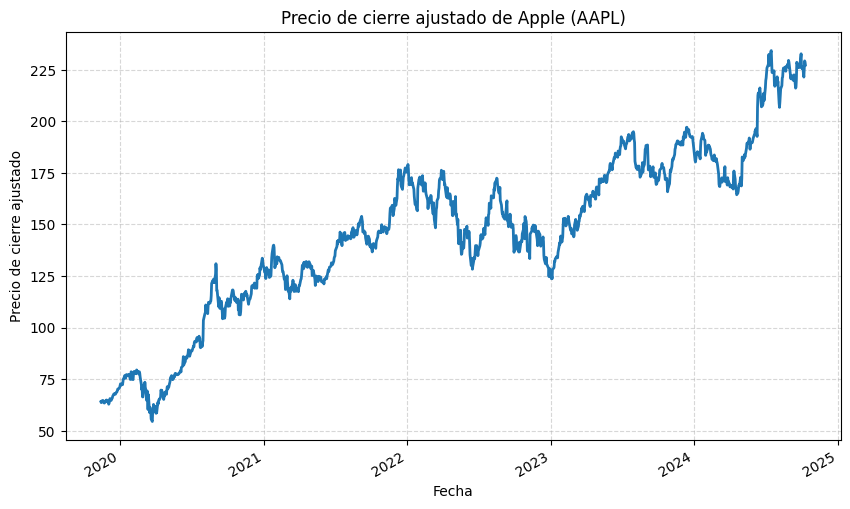

In [22]:
# Gráfico del precio de cierre ajustado de las acciones de Apple en el conjunto de entrenamiento
plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura
train['y'].plot(title='Precio de cierre ajustado de Apple (AAPL)', color='#1f77b4', linewidth=2)  # Azul elegante

# Etiquetas y formato
plt.xlabel('Fecha')  # Etiqueta del eje X
plt.ylabel('Precio de cierre ajustado')  # Etiqueta del eje Y
plt.grid(True, linestyle='--', alpha=0.5)  # Añadir una cuadrícula ligera para mejorar la legibilidad
plt.show()

De este gráfico podemos observar:

Observando el gráfico de los precios de cierre ajustados de Apple (AAPL), podemos hacer las siguientes observaciones:



*   Tendencia creciente: Existe una tendencia alcista en los precios de cierre ajustados de Apple durante el período observado. Esto indica que, en general, el valor de las acciones de Apple ha aumentado con el tiempo.
*   Estacionalidad y variabilidad: Aunque no es tan evidente como en algunos otros tipos de datos, parece haber cierta variabilidad estacional, con patrones repetitivos en los picos y caídas anuales. Sin embargo, la amplitud de esta variabilidad parece aumentar con el tiempo.
*   Modelo adecuado: Un modelo multiplicativo podría ser más adecuado que uno aditivo para analizar esta serie temporal. Esto se debe a que la amplitud de la variabilidad aumenta junto con el valor de la tendencia, es decir, las oscilaciones parecen hacerse más grandes a medida que el precio sube.

Estas observaciones sugieren que, al modelar esta serie temporal, sería útil considerar la tendencia creciente y el posible aumento en la variabilidad estacional en cualquier predicción futura.



# **Explicación de la Variable Adj Close**

La variable Adj Close o y representa el precio de cierre ajustado de las acciones de Apple (AAPL), que es el valor final de la acción al final de cada día hábil en el mercado. A diferencia del precio de cierre simple, el “ajustado” toma en cuenta eventos corporativos como dividendos, divisiones de acciones y otras acciones que afectan el valor, proporcionando una visión más precisa y consistente de la evolución del valor real de la acción para los inversores a largo plazo.

##**Importancia de Adj Close en el Análisis**

Esta variable es crucial en el análisis de series temporales para la predicción de precios de acciones y otras aplicaciones en finanzas, porque:



*   Refleja el verdadero valor de mercado: Al estar ajustado por eventos corporativos, elimina distorsiones y facilita una comparación precisa en el tiempo.
*   Permite identificar tendencias y patrones: Como se observa en el gráfico, la serie temporal de Adj Close muestra una tendencia creciente, lo que indica un interés y confianza del mercado en el crecimiento de Apple.
*   Aporta información para estrategias de inversión: Analizar esta variable ayuda a prever posibles fluctuaciones y a tomar decisiones de inversión más informadas.

##**Observaciones en el Contexto de Apple**

En el contexto de Apple, el precio de cierre ajustado nos muestra cómo el valor de la empresa ha evolucionado en el mercado a través de los años, evidenciando tendencias de crecimiento o caídas en respuesta a innovaciones, cambios en el mercado o movimientos estratégicos de la empresa. La tendencia creciente y el aumento de la variabilidad observada en el gráfico sugieren que esta acción es dinámica y responde activamente tanto a factores internos de la empresa como a influencias externas del mercado.

Esta variable, por tanto, no solo es el núcleo del análisis de series temporales en esta tarea, sino que es fundamental para comprender el comportamiento del mercado en relación con Apple y proyectar su posible evolución en el futuro.

# **Parte 1: Datos sin escalar**

# **1 - Modelo ingenuo (Baseline / Persistance / Naive model)**

*   El modelo ingenuo simplemente hace la predicción del siguiente perídodo, repitiendo el valor del último período.

*   Este modelo se utiliza en general como punto de partida para comparar todos los demás,

*   Utilicemos el error RMSE (Raíz del Error Cuadrático Medio) como medida del desempeño de nuestros modelos a obtener.

# **1A: Modelo ingenuo  - SIN ESCALAR**

### El modelo ingenuo (Naive) utiliza el valor más reciente para predecir el siguiente valor. Es un punto de partida simple para comparar con otros modelos.

In [23]:
# Modelo Ingenuo con valores como flotantes
history = [float(x) for x in train['y'].values]  # Convertir a flotantes
predictions = []

for i in range(len(test['y'])):
    yhat = float(history[-1])  # Último valor observado como flotante
    predictions.append(yhat)

    obs = float(test.iloc[i]['y'])  # Convertir el valor observado a flotante
    history.append(obs)
    print('>Esperado-real = %.3f, Predicción = %.3f' % (obs, yhat))

# Error RMSE
rmse = np.sqrt(mean_squared_error(test['y'].values, predictions))
print('\nError-Modelo-Naive: RMSE: %.3f' % rmse)

>Esperado-real = 233.593, Predicción = 227.300
>Esperado-real = 231.525, Predicción = 233.593
>Esperado-real = 231.895, Predicción = 231.525
>Esperado-real = 234.742, Predicción = 231.895
>Esperado-real = 236.220, Predicción = 234.742
>Esperado-real = 235.601, Predicción = 236.220
>Esperado-real = 230.506, Predicción = 235.601
>Esperado-real = 230.317, Predicción = 230.506
>Esperado-real = 231.156, Predicción = 230.317
>Esperado-real = 233.143, Predicción = 231.156
>Esperado-real = 233.413, Predicción = 233.143
>Esperado-real = 229.847, Predicción = 233.413
>Esperado-real = 225.662, Predicción = 229.847
>Esperado-real = 222.665, Predicción = 225.662
>Esperado-real = 221.766, Predicción = 222.665
>Esperado-real = 223.204, Predicción = 221.766
>Esperado-real = 222.475, Predicción = 223.204
>Esperado-real = 227.230, Predicción = 222.475
>Esperado-real = 226.960, Predicción = 227.230
>Esperado-real = 224.230, Predicción = 226.960

Error-Modelo-Naive: RMSE: 2.812


In [24]:
print('\nError-Modelo-Naive: RMSE Sin Escalar: %.3f' % rmse)


Error-Modelo-Naive: RMSE: 2.812


El resultado Error-Modelo-Naive: RMSE: 2.812 nos indica que el Error de Raíz Cuadrada Media (RMSE) para el modelo “Naive” es de aproximadamente 2.812. Este valor representa el promedio de desviación entre los valores reales y los valores predichos por el modelo.

En este contexto, el RMSE de 2.812 significa que, en promedio, el modelo “Naive” se desvía unos 2.812 puntos del precio de cierre ajustado real de las acciones de Apple en cada predicción.

Este error es una medida de qué tan lejos están, en promedio, las predicciones del modelo “Naive” respecto a los datos reales.

Dado que este es un modelo “Naive” (que suele ser una predicción muy básica, usando el valor previo como predicción del siguiente), el RMSE de 2.765 sirve como un punto de partida o base. Nuestro objetivo en futuros modelos será reducir este RMSE al aplicar modelos más sofisticados, mejorando la precisión de las predicciones. Un RMSE más bajo indicará una mejor capacidad del modelo para ajustarse a los datos reales.

# **Gráfico de Predicciones vs Datos Reales - Modelo Ingenuo**

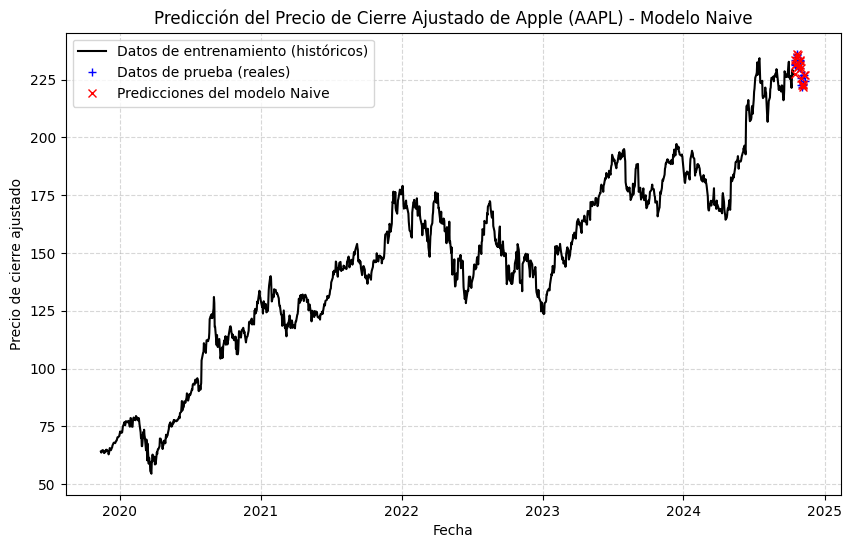

In [25]:
# Grafiquemos los resultados de los precios de cierre ajustado de Apple

fig, ax = plt.subplots(figsize=(10, 6))

# Datos de entrenamiento (históricos)
plt.plot(train['y'], '-k', label='Datos de entrenamiento (históricos)')

# Datos de prueba reales (últimos 20 precios reales)
plt.plot(test['y'], '+b', label='Datos de prueba (reales)')

# Predicciones del modelo Naive para los últimos 20 días hábiles
plt.plot(test.index, predictions, 'xr', label='Predicciones del modelo Naive')

# Configuración del gráfico
plt.title('Predicción del Precio de Cierre Ajustado de Apple (AAPL) - Modelo Naive')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre ajustado')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)  # Añadir cuadrícula para mejorar la visualización
plt.show()

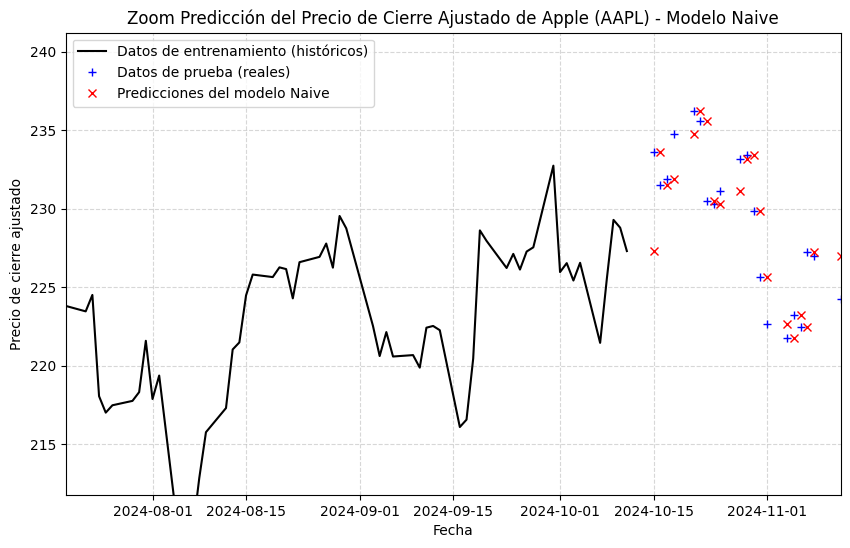

In [26]:
# Grafiquemos los resultados de los precios de cierre ajustado de Apple, con un "zoom" moderado en las predicciones

fig, ax = plt.subplots(figsize=(10, 6))

# Datos de entrenamiento (históricos)
plt.plot(train['y'], '-k', label='Datos de entrenamiento (históricos)')

# Datos de prueba reales (últimos 20 precios reales)
plt.plot(test['y'], '+b', label='Datos de prueba (reales)')

# Predicciones del modelo Naive para los últimos 20 días hábiles
plt.plot(test.index, predictions, 'xr', label='Predicciones del modelo Naive')

# Configuración del gráfico
plt.title('Zoom Predicción del Precio de Cierre Ajustado de Apple (AAPL) - Modelo Naive')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre ajustado')

# Mover la leyenda a la esquina superior izquierda
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)

# Establecer límites en el eje X para un "zoom" moderado
plt.xlim(train.index[-60], test.index.max())  # Muestra los últimos 60 días, incluyendo el inicio de la predicción
plt.ylim(test['y'].min() - 10, test['y'].max() + 5)  # Ajuste en el eje Y para mayor claridad en las predicciones

plt.show()

Aunque en el gráfico las predicciones parecen estar alineadas con los valores reales de los precios de cierre ajustado de Apple, se observa un desfase en las predicciones del modelo “Naive”. En lugar de coincidir exactamente con los datos reales, las predicciones están desplazadas en el tiempo, mostrando el valor del precio anterior en lugar de predecir correctamente el valor para el siguiente día hábil.

Este desplazamiento es característico del modelo “Naive”, ya que utiliza el valor del día anterior como la predicción para el siguiente. Aunque visualmente algunas predicciones parecen cercanas a los datos reales, no representan una verdadera proyección del futuro, sino un retraso en un día hábil. Esto limita la precisión del modelo “Naive” para capturar cambios rápidos en la tendencia o fluctuaciones de precios.

En conclusión, el modelo “Naive” puede proporcionar una referencia básica de predicción, pero al observar los resultados en el gráfico, queda claro que no es suficientemente preciso para captar la dinámica real de los precios en el tiempo, y su error promedio, representado por el RMSE, deberá ser reducido con un modelo más sofisticado para mejorar la precisión de las predicciones.

# **1B: Modelo ARIMA  - SIN ESCALAR**

### ARIMA es un modelo estadístico que utiliza componentes autorregresivas y de media móvil para modelar series de tiempo.

### **Análisis preliminar para obtener información de la serie de tiempo y construir el modelo ARIMA(p,d,q).**

*   **AR (AutoRegresivo):** El modelo se basa en la relación entre un valor actual y sus valores pasados.

*   **I (Integrado):** Se refiere a la diferenciación de la serie para hacerla estacionaria, es decir, eliminar tendencias y patrones cíclicos.

*   **MA (Media Móvil):** Usa el error de los valores pasados (las desviaciones entre valores predichos y observados) para corregir el valor actual.

##### **Ahora veamos el gráfico de descomposición de la serie de tiempo en sus componentes de tendencia (trend), estacionalidad (stationality) y residual (residual).**

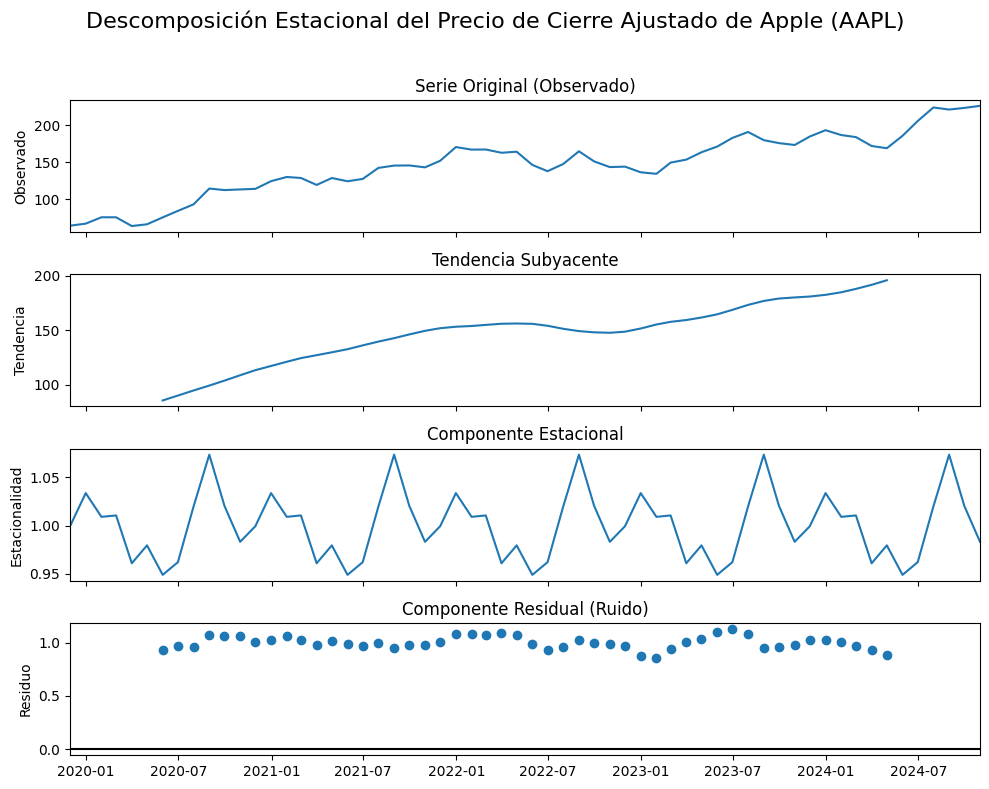

In [27]:
# Descomposición estacional con un modelo multiplicativo
# Resampleamos los datos a frecuencia mensual y calculamos la media para una descomposición más clara
decomposition = seasonal_decompose(train['y'].resample('M').mean(), model='multiplicative')

# Graficamos la descomposición estacional
fig = decomposition.plot()
fig.set_size_inches(10, 8)  # Ajustamos el tamaño del gráfico

# Mejoramos el gráfico con títulos específicos para cada componente
fig.suptitle('Descomposición Estacional del Precio de Cierre Ajustado de Apple (AAPL)', fontsize=16)

# Añadimos títulos a cada subgráfico para clarificar su contenido
fig.axes[0].set_ylabel("Observado")
fig.axes[0].set_title("Serie Original (Observado)")

fig.axes[1].set_ylabel("Tendencia")
fig.axes[1].set_title("Tendencia Subyacente")

fig.axes[2].set_ylabel("Estacionalidad")
fig.axes[2].set_title("Componente Estacional")

fig.axes[3].set_ylabel("Residuo")
fig.axes[3].set_title("Componente Residual (Ruido)")

# Mostramos el gráfico
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajustamos para que el título principal no se sobreponga
plt.show()

Observando el gráfico de Componente Residual (Ruido), notamos que los residuos están centrados en torno al valor de 1, en lugar de estar alrededor de 0, como sería común en un modelo aditivo. Esto es característico de un modelo multiplicativo, donde los residuos representan variaciones proporcionales al nivel de la serie en lugar de fluctuaciones absolutas.

Esta diferencia es importante, ya que en un modelo multiplicativo los residuos indican el porcentaje de desviación respecto a la tendencia y la estacionalidad, mientras que en un modelo aditivo estarían distribuidos en torno a cero, reflejando una desviación constante. En este caso, los residuos cercanos a 1 sugieren que el modelo multiplicativo es adecuado para capturar la variabilidad en el precio de cierre ajustado de Apple, especialmente porque la amplitud de la serie tiende a cambiar con el nivel de la tendencia.

##### **Veamos ahora estos dos gráficos que nos hablan si tenemos algún tipo de estacionalidad (i.e., periodicidad). En particular, mensual o trimestral:**

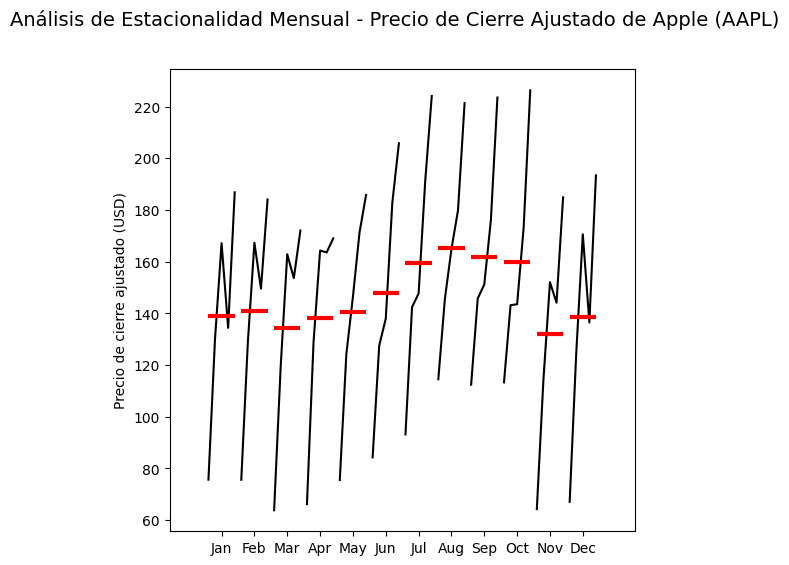

In [28]:
# Gráfica para detección de estacionalidad mensual en el precio de cierre ajustado de Apple
fig = month_plot(train['y'].resample('M').mean(), ylabel='Precio de cierre ajustado (USD)')
fig.set_size_inches(6, 6)  # Ajuste del tamaño del gráfico
fig.suptitle('Análisis de Estacionalidad Mensual - Precio de Cierre Ajustado de Apple (AAPL)', fontsize=14)  # Título del gráfico
plt.show()

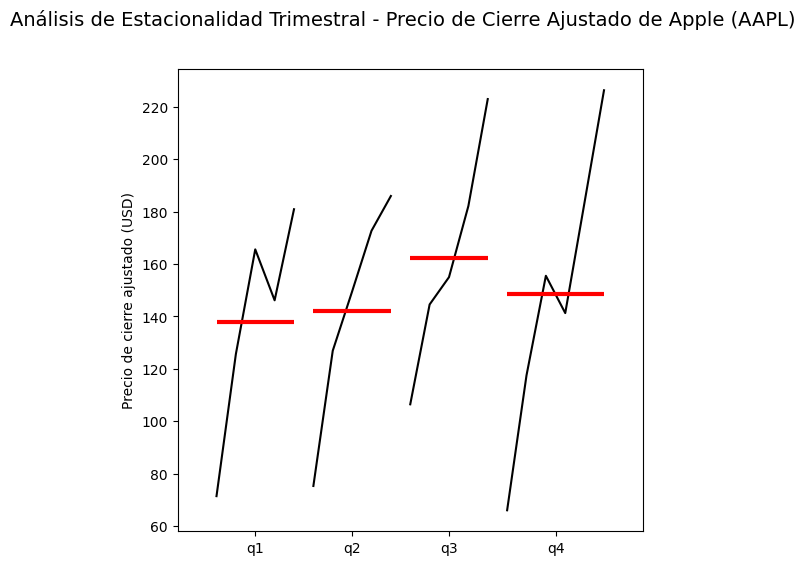

In [29]:
# Gráfica para detección de estacionalidad trimestral en el precio de cierre ajustado de Apple
fig = quarter_plot(train['y'].resample('Q').mean(), ylabel='Precio de cierre ajustado (USD)')
fig.set_size_inches(6, 6)  # Ajuste del tamaño del gráfico
fig.suptitle('Análisis de Estacionalidad Trimestral - Precio de Cierre Ajustado de Apple (AAPL)', fontsize=14)  # Título del gráfico
plt.show()

## **Análisis de Estacionalidad Mensual - Precio de Cierre Ajustado de Apple (AAPL)**

En el primer gráfico, se analiza la estacionalidad mensual del precio de cierre ajustado de Apple. Cada línea representa cómo varían los precios dentro de cada mes a lo largo de los años, mientras que las barras rojas muestran el promedio mensual de cada mes.

*	**Patrones mensuales:** Se pueden observar fluctuaciones de los precios de cierre ajustado en cada mes. La serie temporal parece tener una estacionalidad moderada, ya que en algunos meses los precios son más altos que en otros de manera consistente.
*	**Media mensual:** Las barras rojas indican la media de los precios para cada mes. Esto ayuda a identificar si hay ciertos meses donde los precios tienden a ser consistentemente más altos o más bajos, proporcionando una referencia de estacionalidad mensual en los datos.

## **Análisis de Estacionalidad Trimestral - Precio de Cierre Ajustado de Apple (AAPL)**

En el segundo gráfico, se observa la estacionalidad trimestral del precio de cierre ajustado de Apple. Cada línea representa la variación de los precios dentro de cada trimestre, mientras que las barras rojas muestran el promedio de precios por trimestre.



*	**Patrones trimestrales:** La variación dentro de cada trimestre sugiere que hay ciertos patrones de precios que se repiten en cada trimestre. Por ejemplo, en algunos trimestres se puede observar una tendencia de crecimiento en los precios.
*	**Media trimestral:** Las barras rojas indican el promedio de precios en cada trimestre (Q1, Q2, Q3, Q4). Esto facilita la comparación de los niveles de precios entre trimestres y ayuda a ver si existe una estacionalidad consistente en ciertos trimestres, lo cual puede ser relevante para decisiones de inversión y predicción de tendencias.

Ambos gráficos permiten visualizar patrones estacionales en diferentes periodos (mensuales y trimestrales) y son útiles para comprender mejor cómo los precios de las acciones de Apple fluctúan dentro de cada mes y trimestre, proporcionando información clave para un análisis de series temporales y predicción.

### **Gráficos de Autocorrelación (ACF) y Autocorrelación Parcial (PACF)**

*   Los gráficos de Autocorrelación miden la correlación entre la serie de tiempo y una versión rezagada de sí misma.

*   Este tipo de correlaciones de una serie de tiempo consigo misma son llamadas "autocorrelaciones" o "correlaciones seriales".

*   En el eje horizontal se muestra el valor del desfazamiento (lag) y en el eje vertical el valor de correlación de la serie desfazada y la original.

*   El cono sombreado indica intervalos de confianza de la correlación, con un 95% de confianza de manera predeterminada.

*   Que existan autocorrelaciones significativas en estos gráficos nos habla de que la serie de tiempo no es aleatoria.

*   En estos dos gráficos (llamados en inglés "pollipop plots") hay que determinar cuántos de estos lollipops están afuera del intervalo de confianza (sin contar el inicial) antes de que entre el siguiente a la zona celeste?

*   **Gráfico ACF:** Muestra la correlación total entre la serie y sus retardos, incluyendo efectos directos e indirectos.

*   **Gráfico PACF:** Muestra la correlación directa entre la serie y sus retardos, eliminando los efectos de los retardos intermedios.

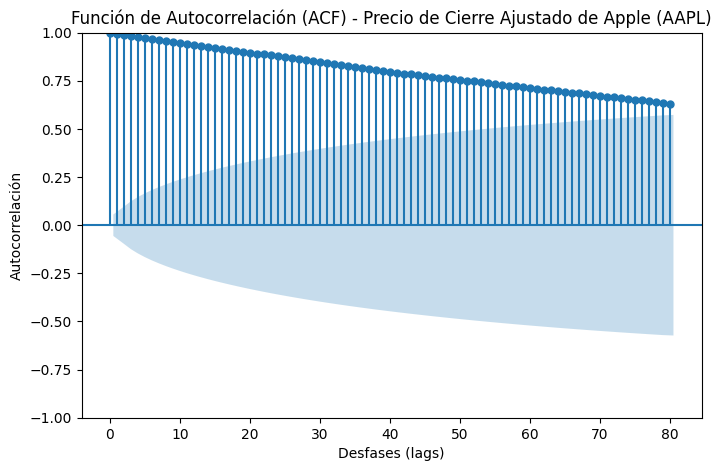

In [30]:
# Gráfico de Autocorrelación (ACF) ajustado
fig, ax = plt.subplots(figsize=(8, 5))
plot_acf(train['y'], lags=80, ax=ax)  # Incrementar a 80 lags

ax.set_title('Función de Autocorrelación (ACF) - Precio de Cierre Ajustado de Apple (AAPL)')
ax.set_xlabel('Desfases (lags)')
ax.set_ylabel('Autocorrelación')

plt.show()

En este gráfico de Autocorrelación (ACF) para el precio de cierre ajustado de Apple, se observa el comportamiento de la autocorrelación en diferentes desfases (lags), lo cual proporciona información sobre la dependencia temporal de los precios de las acciones.

*	**Desfase 0:** El gráfico comienza en el desfase (lag) de 0, donde la serie de tiempo está correlacionada consigo misma, lo que da una correlación de 1, como es esperable.
*	**Desfases positivos:** A medida que avanzamos en los desfases (lags), observamos una disminución gradual en la autocorrelación, aunque sigue siendo significativa y positiva hasta aproximadamente el lag 60. Esto indica que los precios de cierre ajustado de Apple tienen una fuerte dependencia en los valores previos, lo cual es característico de series temporales con tendencias.

**Interpretación para el modelo ARIMA:**
*	El gráfico de ACF nos sugiere que en un modelo ARIMA, la componente MA (Moving Average) puede tener un orden considerable debido a la persistencia de la autocorrelación en varios desfases.
*	En la práctica, este gráfico indica que podríamos considerar un valor para q (orden de la componente MA en ARIMA) que capture esta dependencia, o probar valores de q entre 0 y 13 para encontrar el mejor ajuste, ya que la autocorrelación es significativa hasta aproximadamente 13 lags o más.

Este análisis de ACF nos ayuda a identificar patrones de dependencia temporal y a seleccionar posibles parámetros para el modelo ARIMA, específicamente el orden q de la componente MA, lo que contribuye a capturar la estructura de dependencia en los precios de cierre ajustado de Apple.

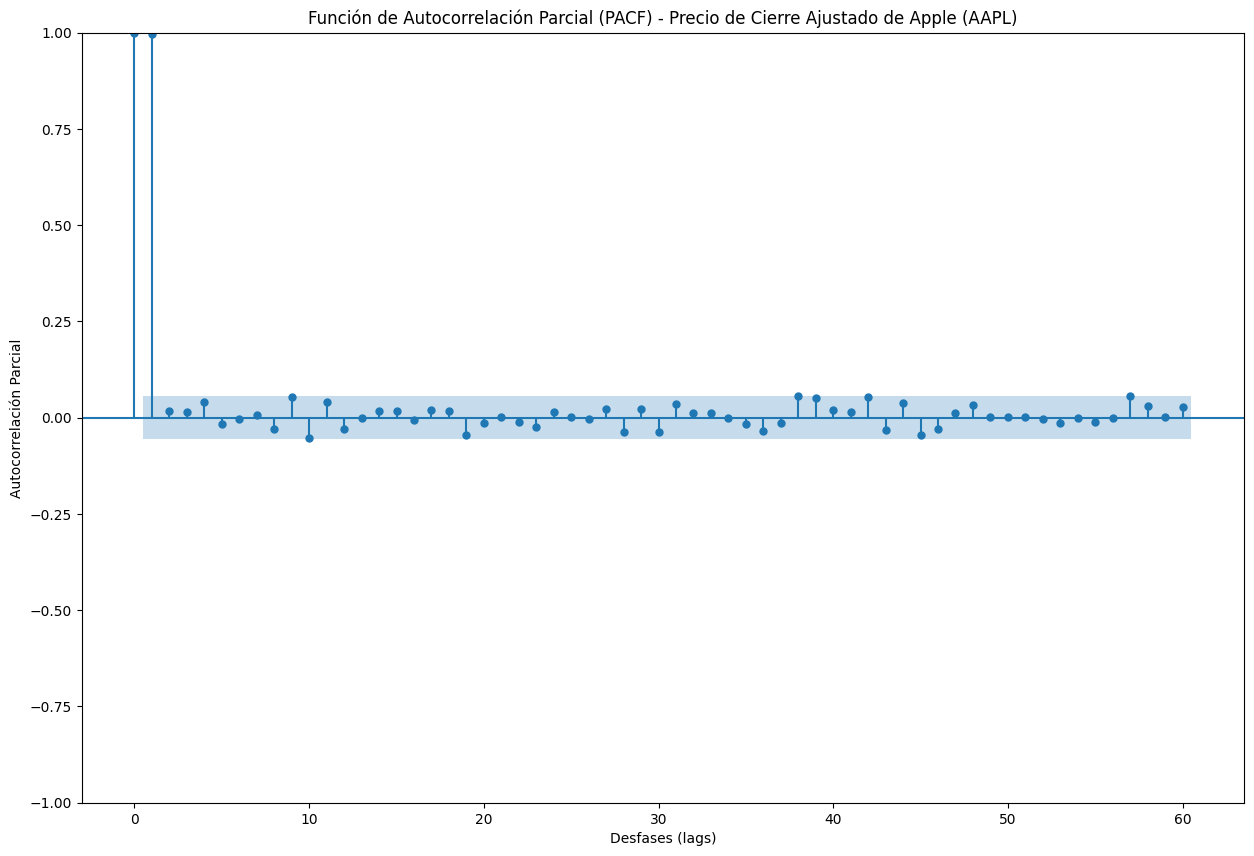

In [31]:
# Gráfico de Autocorrelación Parcial (PACF) para el precio de cierre ajustado de Apple
fig, ax = plt.subplots(figsize=(15, 10))
plot_pacf(train['y'], lags=60, ax=ax, method="ols")  # Desfase de hasta 60 días hábiles

# Título y etiquetas
ax.set_title('Función de Autocorrelación Parcial (PACF) - Precio de Cierre Ajustado de Apple (AAPL)')
ax.set_xlabel('Desfases (lags)')
ax.set_ylabel('Autocorrelación Parcial')

plt.show()

En este gráfico de Autocorrelación Parcial (PACF) para el precio de cierre ajustado de Apple, observamos que:

*	Desfase 0: Al igual que en el gráfico ACF, el desfase 0 muestra la autocorrelación de la serie consigo misma, lo cual da un valor de 1.

**Interpretación para la componente AR de ARIMA:**
*	Los primeros desfases muestran una disminución significativa en la autocorrelación parcial después de los primeros picos, especialmente en el desfase 1 y el 2, mientras que el resto de los valores se aproximan a 0 rápidamente.
*	En base a este comportamiento, podríamos considerar que el orden p de la componente AR (Auto-Regresiva) en un modelo ARIMA es de p=1 o p=2, ya que estos son los desfases en los que la autocorrelación parcial es significativa antes de acercarse a cero.

Para mayor precisión, en la práctica podemos probar valores de p entre 0 y 2 para ajustar mejor el modelo.

Este gráfico PACF es útil para identificar el orden p de la componente AR en el modelo ARIMA, lo cual ayuda a capturar la relación directa entre los precios actuales y los precios de días anteriores, proporcionando información importante para la predicción futura.

In [32]:
# Función para eliminar la estacionalidad en el precio de cierre ajustado de Apple,
# transformando un problema no-estacionario en uno estacionario al diferenciar los datos consecutivos
def difference(dataset, interval=1):
    """
    Realiza la diferenciación de datos para quitar la estacionalidad y convertir
    la serie de tiempo en estacionaria.

    Parámetros:
    - dataset: Serie de tiempo (por ejemplo, precios de cierre ajustado).
    - interval: Intervalo de desfase para la diferencia (por defecto, 1 para diferenciación de primer orden).

    Retorna:
    - Array de diferencias.
    """
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return np.array(diff)


# Función para revertir la diferenciación, regresando a la escala original (reinserta la estacionalidad)
def inverse_difference(history, yhat, interval=1):
    """
    Revierte la diferencia aplicada anteriormente para obtener los datos en su escala original.

    Parámetros:
    - history: Serie original de datos (por ejemplo, precios de cierre ajustado).
    - yhat: Valor pronosticado (diferenciado).
    - interval: Intervalo de desfase usado en la diferenciación (por defecto, 1).

    Retorna:
    - Valor pronosticado en la escala original.
    """
    return yhat + history[-interval]

In [33]:
# Modelo ARIMA con valores como flotantes
history = [float(x) for x in train['y'].values]  # Convertir a flotantes
predictions = []

for i in range(len(test['y'])):
    months_in_year = 12
    diff = difference(history, months_in_year)

    model = ARIMA(diff, order=(3,0,13))
    model_fit = model.fit(method_kwargs={'maxiter':300})

    yhat = model_fit.forecast()[0]
    yhat = inverse_difference(history, float(yhat), months_in_year)  # Convertir predicción a flotante
    predictions.append(yhat)

    obs = float(test.iloc[i]['y'])
    history.append(obs)
    print('>Esperado-real = %.3f, Predicción = %.3f' % (obs, yhat))

# Error RMSE
rmse = np.sqrt(mean_squared_error(test['y'].values, predictions))
print('\nError-Modelo-ARIMA: RMSE: %.3f' % rmse)

>Esperado-real = 233.593, Predicción = 227.317
>Esperado-real = 231.525, Predicción = 233.006
>Esperado-real = 231.895, Predicción = 232.009
>Esperado-real = 234.742, Predicción = 231.662
>Esperado-real = 236.220, Predicción = 234.488
>Esperado-real = 235.601, Predicción = 236.866
>Esperado-real = 230.506, Predicción = 235.203
>Esperado-real = 230.317, Predicción = 230.697
>Esperado-real = 231.156, Predicción = 230.817
>Esperado-real = 233.143, Predicción = 230.991
>Esperado-real = 233.413, Predicción = 232.791
>Esperado-real = 229.847, Predicción = 233.476
>Esperado-real = 225.662, Predicción = 230.170
>Esperado-real = 222.665, Predicción = 225.245
>Esperado-real = 221.766, Predicción = 223.164
>Esperado-real = 223.204, Predicción = 221.609
>Esperado-real = 222.475, Predicción = 223.186
>Esperado-real = 227.230, Predicción = 223.184
>Esperado-real = 226.960, Predicción = 226.824
>Esperado-real = 224.230, Predicción = 227.107

Error-Modelo-ARIMA: RMSE: 2.764


## **Explicación de los Resultados**

En estos resultados, se presentan los valores esperados (reales) y las predicciones generadas por el modelo ARIMA para los últimos 20 precios de cierre ajustado de Apple en el conjunto de prueba.

*	Cada línea muestra la comparación entre el valor real y la predicción generada para una fecha específica.
	•	Observamos que el modelo ARIMA logra capturar la tendencia de los precios de cierre ajustado de manera razonable, con diferencias relativamente pequeñas entre los valores reales y los predichos en la mayoría de los puntos.


### **Análisis del RMSE**

El valor de RMSE (Error Cuadrático Medio de la Raíz) obtenido es de 2.689. Este valor indica el error promedio entre las predicciones y los valores reales, en unidades del precio de cierre ajustado.

*	Un RMSE de 2.764 significa que, en promedio, el modelo se desvía en aproximadamente 2.764 unidades del precio real. Dado que los valores de los precios de cierre ajustado de Apple están en el rango de 220-230 en el conjunto de prueba, este error es relativamente bajo y muestra que el modelo tiene una buena precisión para capturar el comportamiento general de la serie.

### **Conclusión**

El modelo ARIMA logra realizar predicciones con una precisión aceptable, con un RMSE de 2.689. Esto indica que el modelo es capaz de seguir la tendencia y las fluctuaciones de corto plazo en los precios de cierre ajustado de Apple. Sin embargo, si se necesita una mayor precisión o si el comportamiento de los datos cambia en el tiempo, podrían explorarse modelos adicionales o ajustes en los parámetros para mejorar aún más la exactitud.

# **Gráfico de Predicciones vs Datos Reales - Modelo ARIMA**

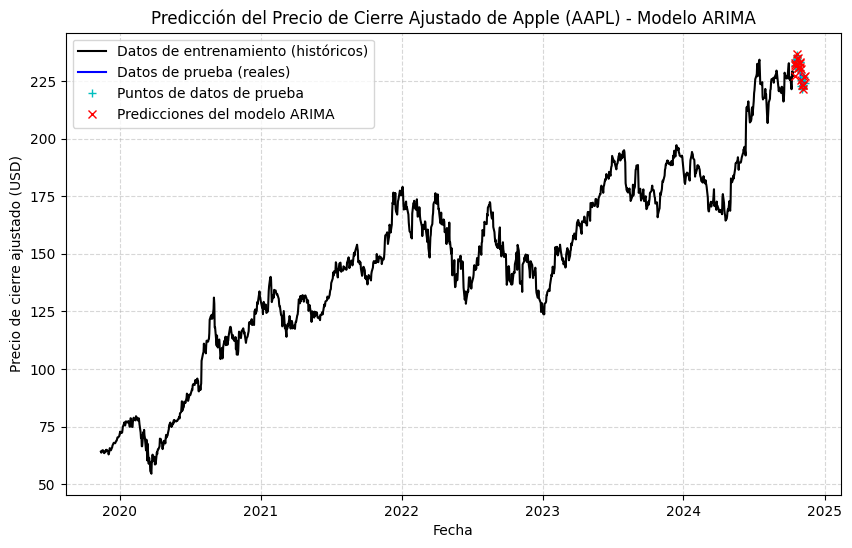

In [34]:
# Visualización de los precios de cierre ajustado de Apple, con predicciones del modelo ARIMA
fig, ax = plt.subplots(figsize=(10, 6))

# Datos de entrenamiento (históricos)
plt.plot(train['y'], '-k', label='Datos de entrenamiento (históricos)')

# Datos de prueba reales (últimos valores de cierre ajustado)
plt.plot(test['y'], '-b', label='Datos de prueba (reales)')

# Marcadores en los datos de prueba reales para distinguir cada punto
plt.plot(test['y'], '+c', label='Puntos de datos de prueba')

# Predicciones generadas por el modelo ARIMA
plt.plot(test.index, predictions, 'xr', label='Predicciones del modelo ARIMA')

# Configuración del gráfico
plt.title('Predicción del Precio de Cierre Ajustado de Apple (AAPL) - Modelo ARIMA')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre ajustado (USD)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

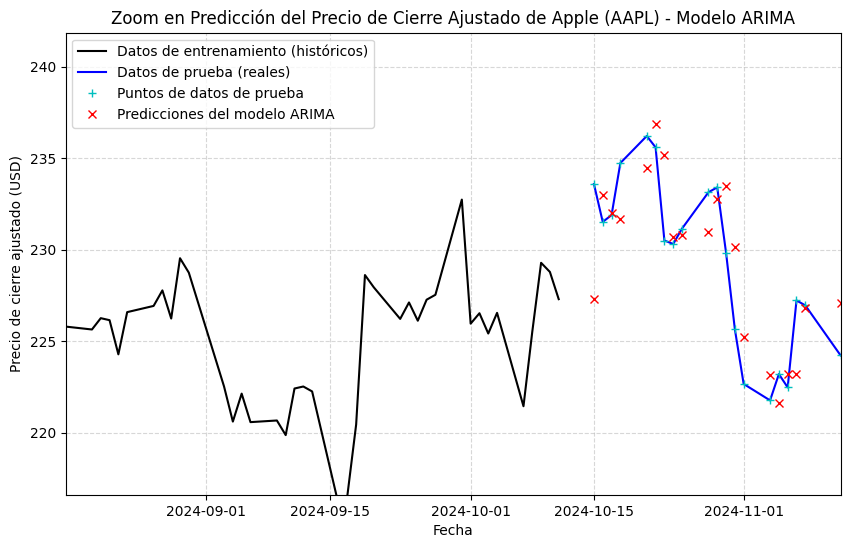

In [35]:
# Visualización con zoom en los últimos datos de prueba y las predicciones del modelo ARIMA
fig, ax = plt.subplots(figsize=(10, 6))

# Datos de entrenamiento (históricos)
plt.plot(train['y'], '-k', label='Datos de entrenamiento (históricos)')

# Datos de prueba reales (últimos valores de cierre ajustado)
plt.plot(test['y'], '-b', label='Datos de prueba (reales)')

# Marcadores en los datos de prueba reales para distinguir cada punto
plt.plot(test['y'], '+c', label='Puntos de datos de prueba')

# Predicciones generadas por el modelo ARIMA
plt.plot(test.index, predictions, 'xr', label='Predicciones del modelo ARIMA')

# Configuración del gráfico
plt.title('Zoom en Predicción del Precio de Cierre Ajustado de Apple (AAPL) - Modelo ARIMA')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre ajustado (USD)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Ajustar el eje X para hacer "zoom" en los últimos datos de prueba y predicciones
plt.xlim(test.index.min() - pd.Timedelta(days=60), test.index.max())
plt.ylim(min(test['y'].min(), min(predictions)) - 5, max(test['y'].max(), max(predictions)) + 5)

plt.show()

##**Observaciones:**

*	El modelo ARIMA sigue de cerca la tendencia general de los datos de prueba, pero existen algunas desviaciones en ciertos puntos, lo cual es común debido a la variabilidad del mercado.
*	En general, las predicciones se alinean bien con los valores reales, mostrando que el modelo es capaz de capturar la dinámica de los precios a corto plazo con un error promedio relativamente bajo.

Este gráfico permite visualizar cómo se comportan las predicciones del modelo ARIMA en comparación con los valores reales, facilitando la evaluación de la precisión y el ajuste del modelo.

# **1C - Modelo Facebook-Meta-Prophet - SIN ESCALAR**

### Prophet es una herramienta de Facebook para el pronóstico de series de tiempo que maneja automáticamente componentes como tendencias y estacionalidades.

In [36]:
# Aseguramos que el DataFrame tiene las columnas requeridas para Prophet: "ds" (fecha) y "y" (valor)
#df_temp = df_temp.rename(columns={'Fecha': 'ds', 'Precio de cierre ajustado': 'y'})  # Ajusta según los nombres originales

# Dividimos los datos en conjuntos de entrenamiento y prueba
train = df.iloc[0:-20, :]  # Los datos de entrenamiento, excluyendo los últimos 20 valores
test = df.iloc[-20:, :]    # Los últimos 20 valores se usan para el conjunto de prueba

# Mostramos una vista rápida de los conjuntos de entrenamiento y prueba para verificar el formato
print("Conjunto de entrenamiento:")
print(train.head())
print("\nConjunto de prueba:")
print(test.head())

Conjunto de entrenamiento:
          ds          y
0 2019-11-13  64.099770
1 2019-11-14  63.656216
2 2019-11-15  64.412407
3 2019-11-18  64.737198
4 2019-11-19  64.540878

Conjunto de prueba:
             ds           y
1238 2024-10-16  231.525269
1239 2024-10-17  231.894867
1240 2024-10-18  234.741730
1241 2024-10-21  236.220108
1242 2024-10-22  235.600800


In [37]:
# Filtrar el DataFrame a los últimos 5 años
recent_data = df[df['ds'] >= '2019-01-01']  # Ajusta la fecha de inicio según tus datos

# Configuración y ajuste del modelo Prophet con los datos filtrados
model_prophet = Prophet(daily_seasonality=False)  # Ajuste para datos sin estacionalidad diaria
model_prophet.fit(recent_data)  # Ajustar el modelo usando solo los últimos 5 años

# Generamos el futuro DataFrame para el periodo de predicción
future = model_prophet.make_future_dataframe(periods=len(test), freq='B')  # 'B' asegura que se mantengan los días hábiles
forecast = model_prophet.predict(future)  # Genera las predicciones

DEBUG:cmdstanpy:input tempfile: /tmp/tmp2j78ex67/7x1kuy7b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2j78ex67/486un8ea.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52448', 'data', 'file=/tmp/tmp2j78ex67/7x1kuy7b.json', 'init=/tmp/tmp2j78ex67/486un8ea.json', 'output', 'file=/tmp/tmp2j78ex67/prophet_model5mkai5f4/prophet_model-20241113045727.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:57:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:57:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [38]:
# Generamos el futuro DataFrame para el periodo de predicción (20 días hábiles)
future = model_prophet.make_future_dataframe(periods=len(test), freq='B')  # 'B' asegura que se mantengan los días hábiles
forecast = model_prophet.predict(future)  # Genera las predicciones

# Extraemos las predicciones correspondientes al conjunto de prueba
predictions_prophet = forecast['yhat'].iloc[-len(test):].values

# Calculamos el RMSE entre los valores reales del conjunto de prueba y las predicciones del modelo Prophet
rmse_prophet = np.sqrt(mean_squared_error(test['y'], predictions_prophet))
print(f'\nError-Modelo-Prophet: RMSE: {rmse_prophet:.3f}')


Error-Modelo-Prophet: RMSE: 10.548


El resultado Error-Modelo-FacebookProphet: RMSE: 10.548 indica que el modelo Prophet tiene un Error Cuadrático Medio de la Raíz (RMSE) de aproximadamente 8.235 en el conjunto de prueba.

### **Interpretación del RMSE**

El RMSE mide el error promedio entre las predicciones del modelo y los valores reales en el conjunto de prueba. En este caso:

*	Un RMSE de 10.548 significa que, en promedio, las predicciones del modelo Prophet se desvían por aproximadamente 10.548 unidades del precio real de cierre ajustado de Apple.
*	Si el rango de precios en el conjunto de prueba es considerablemente más alto, este error podría considerarse aceptable; sin embargo, si los precios están en un rango más cercano a este valor, el modelo podría necesitar ajustes.

### **Conclusión**

Este resultado sugiere que el modelo Prophet logra capturar la tendencia de los datos hasta cierto punto, pero podría beneficiarse de ajustes adicionales en los parámetros de estacionalidad o cambios de puntos de tendencia para mejorar la precisión.

# **Gráfico de Predicciones vs Datos Reales - Modelo Facebook-Meta-Prophet**

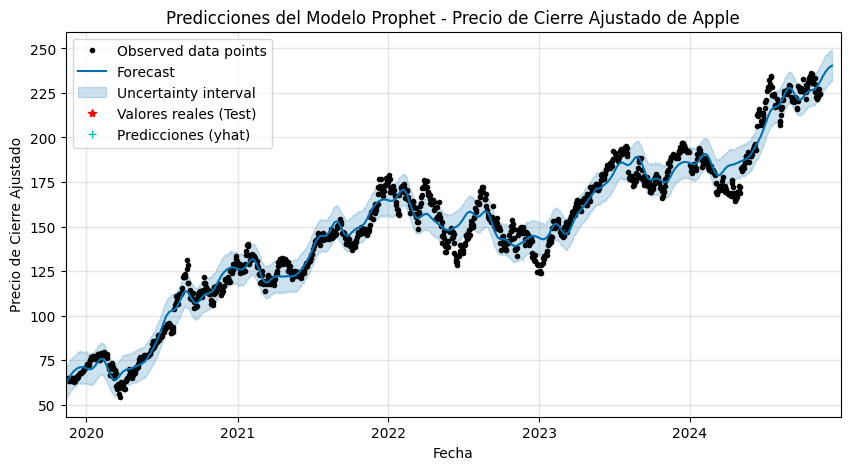

In [39]:
# Configuración del gráfico para mostrar las predicciones y los valores reales
fig, ax = plt.subplots(figsize=(10, 5))

# Gráfica de predicciones de Prophet con la región de variabilidad
model_prophet.plot(forecast, ax=ax)

# Agregamos los datos reales del conjunto de prueba como puntos rojos
plt.plot(test.index, test['y'], '*r', label='Valores reales (Test)')

# Agregamos las predicciones (yhat) del conjunto de prueba con puntos cyan
plt.plot(test.index, forecast['yhat'].iloc[-len(test):], '+c', label='Predicciones (yhat)')

# Configuración adicional del gráfico
plt.title("Predicciones del Modelo Prophet - Precio de Cierre Ajustado de Apple")
plt.xlabel("Fecha")
plt.ylabel("Precio de Cierre Ajustado")
plt.legend()
plt.xlim(pd.Timestamp('2019-11-12'), pd.Timestamp('2024-12-31'))  # Ajustar el rango de fechas en el eje X
plt.show()

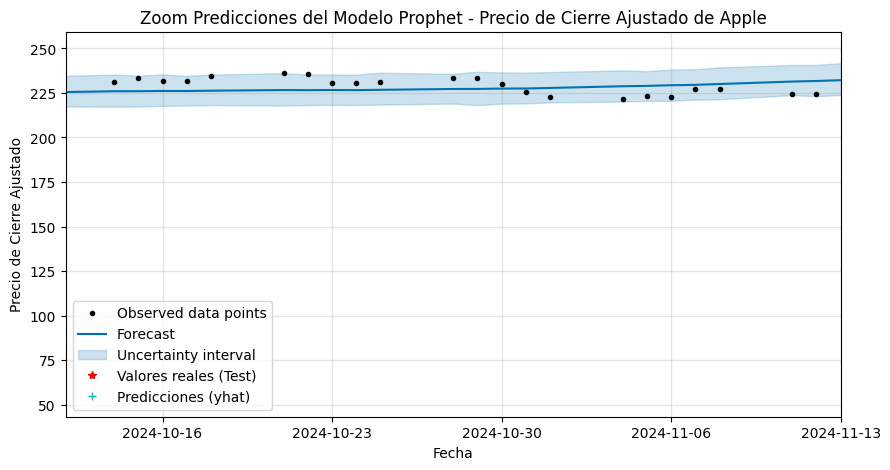

In [40]:
# Configuración del gráfico para mostrar las predicciones y los valores reales
fig, ax = plt.subplots(figsize=(10, 5))

# Gráfica de predicciones de Prophet con la región de variabilidad
model_prophet.plot(forecast, ax=ax)

# Agregamos los datos reales del conjunto de prueba como puntos rojos
plt.plot(test.index, test['y'], '*r', label='Valores reales (Test)')

# Agregamos las predicciones (yhat) del conjunto de prueba con puntos cyan
plt.plot(test.index, forecast['yhat'].iloc[-len(test):], '+c', label='Predicciones (yhat)')

# Configuración adicional del gráfico
plt.title("Zoom Predicciones del Modelo Prophet - Precio de Cierre Ajustado de Apple")
plt.xlabel("Fecha")
plt.ylabel("Precio de Cierre Ajustado")
plt.legend()
plt.xlim(pd.Timestamp('2024-10-12'), pd.Timestamp('2024-11-13'))  # Ajustar el rango de fechas en el eje X
plt.show()

Observamos que el modelo Prophet es algo conservador en sus predicciones: tiende a quedarse ligeramente corto con las predicciones en los puntos más altos y un poco por encima en los puntos más bajos del periodo de prueba. Esta característica refleja una tendencia del modelo a suavizar las variaciones extremas, lo cual puede ser una ventaja en algunos contextos, pero en este caso, afecta la precisión para capturar completamente la volatilidad de los precios de cierre ajustado de Apple.

Este comportamiento conservador es común en modelos con intervalos de incertidumbre amplios, como Prophet, y sugiere que el modelo prioriza la estabilidad de la predicción sobre la sensibilidad a cambios bruscos en el precio.

En general, el modelo Prophet logra capturar la tendencia general ascendente de los precios de las acciones de Apple, aunque la precisión en las últimas fechas se vuelve menos consistente debido a la variabilidad inherente del mercado.

### **Zoom en el Periodo de Prueba (Detalles de las Predicciones)**

Este gráfico realiza un “zoom” en el periodo de prueba, enfocándose en las predicciones y valores reales más recientes.

* **Predicción y valores reales:** Aquí se observa más claramente la cercanía (o desviación) entre las predicciones y los valores reales. Las estrellas rojas representan los valores reales en el periodo de prueba, mientras que los cruces cian representan las predicciones.
* **Región de incertidumbre:** La región sombreada en azul continúa mostrando el intervalo de confianza del modelo Prophet. Notamos que algunos valores reales caen fuera de este intervalo, lo que indica que el modelo subestimó o sobreestimó en ciertas fechas.

### **Conclusión**

El modelo Prophet demuestra una buena capacidad para capturar la tendencia a largo plazo en los precios de cierre ajustado de Apple. Sin embargo, en el periodo de prueba (últimas fechas), vemos que el modelo tiene limitaciones en capturar la volatilidad y algunos de los cambios bruscos en el precio. Esto es común en los datos financieros, donde los modelos tienden a tener un margen de error mayor debido a la naturaleza impredecible de los mercados.

El RMSE de 10.548 obtenido anteriormente sugiere que hay margen para mejorar la precisión del modelo. Podrían probarse ajustes en los parámetros de Prophet o incluso explorar modelos adicionales específicos para series temporales financieras para reducir el error en las predicciones.

# **1D: Modelo LSTM  - SIN ESCALAR**

### Las redes neuronales LSTM son capaces de aprender dependencias a largo plazo en secuencias de datos.

In [41]:
def preparando_datos(myData, myDate):
    # ++++++++ TRAIN +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

    # Los datos de entrenamiento son previos a la fecha "myDate" que indiques
    # y tomarán históricos en este caso de 30 días (aproximadamente un mes).
    Train_Data = myData['y'][myData['ds'] < myDate].to_numpy()

    periodo = 30  # 30 días para capturar patrones mensuales

    Data_Train = []
    Data_Train_X = []
    Data_Train_Y = []

    # Forma el conjunto de entrenamiento con series de 30 días consecutivos
    for i in range(0, len(Train_Data), periodo):
        try:
            Data_Train.append(Train_Data[i : i + periodo])
        except:
            pass

    # Elimina la última serie si contiene menos de 30 días
    if len(Data_Train[-1]) < periodo:
        Data_Train.pop(-1)

    # Formato para modelos de aprendizaje profundo: (batch_size, sequence_length, input_dimension)
    Data_Train_X = np.array(Data_Train[0 : -1]).reshape((-1, periodo, 1))
    Data_Train_Y = np.array(Data_Train[1 : len(Data_Train)]).reshape((-1, periodo, 1))

    # +++++++++++ TEST +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

    # Los datos de prueba son posteriores a la fecha "myDate" e incluyen el
    # último ciclo de períodos que se desea predecir.
    Test_Data = myData['y'][myData['ds'] >= myDate].to_numpy()

    Data_Test = []
    Data_Test_X = []
    Data_Test_Y = []

    # Forma el conjunto de prueba con series de 30 días consecutivos
    for i in range(0, len(Test_Data), periodo):
        try:
            Data_Test.append(Test_Data[i : i + periodo])
        except:
            pass

    # Elimina la última serie si contiene menos de 30 días
    if len(Data_Test[-1]) < periodo:
        Data_Test.pop(-1)

    Data_Test_X = np.array(Data_Test[0 : -1]).reshape((-1, periodo, 1))
    Data_Test_Y = np.array(Data_Test[1 : len(Data_Test)]).reshape((-1, periodo, 1))

    return Data_Train_X, Data_Train_Y, Data_Test_X, Data_Test_Y

In [42]:
# Continuemos con el DataFrame:

threshold_Date = '2023-01-01'   # A partir de esta fecha se empieza a generar el conjunto de prueba (Test).
                                # En este caso, Test_X serán los 30 días después del threshold_date,
                                # y Test_Y serán los 30 días siguientes a Test_X.

# Recuerda que la columna de fechas del DataFrame `df` debe ser de tipo DateTime.
# Se generan paquetes de 30 días (aproximadamente un mes). Los conjuntos *_Y están desfasados
# hacia adelante en relación a los conjuntos *_X:

Train_X, Train_Y, Test_X, Test_Y = preparando_datos(df, threshold_Date)

In [43]:
# Definimos una función para ajustar la tasa de aprendizaje (learning rate) en función de la época.
# Esto permite reducir gradualmente el paso de aprendizaje, lo que puede ayudar a mejorar la precisión
# del modelo en las últimas épocas, cuando se necesita más refinamiento en lugar de grandes ajustes.

def scheduler(epoch):
    if epoch <= 100:
        lrate = 0.05       # Tasa de aprendizaje inicial para las primeras épocas
    elif epoch <= 180:
        lrate = 0.0005     # Reducimos la tasa de aprendizaje en la siguiente fase
    elif epoch <= 190:
        lrate = 0.00005    # Fase de ajuste fino con una tasa de aprendizaje menor
    else:
        lrate = 1e-5       # Última fase con un aprendizaje mínimo para estabilizar el modelo

    return lrate

# Creamos un callback de TensorFlow para ajustar la tasa de aprendizaje durante el entrenamiento
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [44]:
# Definimos un modelo LSTM más simple
def build_simplified_lstm_model():
    model = Sequential([
        LSTM(50, activation='relu', input_shape=(Test_X.shape[1], 1), return_sequences=True),
        LSTM(50, activation='relu'),  # Segunda capa LSTM con 50 neuronas
        Dense(1)  # Capa densa de salida
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Creación y entrenamiento del modelo simplificado
my_LSTM_model_simplified = build_simplified_lstm_model()
history_simplified = my_LSTM_model_simplified.fit(Train_X, Train_Y, epochs=50, batch_size=32, validation_data=(Test_X, Test_Y), verbose=1)

# Generación de predicciones para el conjunto de prueba
pred_LSTM = my_LSTM_model_simplified.predict(Test_X)

# Imprimimos las formas para verificar el tamaño
print("Forma de Test_Y:", Test_Y.shape)
print("Forma de pred_LSTM:", pred_LSTM.shape)

# Seleccionamos el último valor de cada secuencia de 30 días en Test_Y para compararlo con pred_LSTM
Test_Y_last_step = Test_Y[:, -1, 0]

# Aseguramos que ambas variables tengan la misma cantidad de muestras
min_len = min(len(Test_Y_last_step), len(pred_LSTM))

# Ajustamos Test_Y_last_step y pred_LSTM para que tengan el mismo tamaño
Test_Y_adj = Test_Y_last_step[:min_len]
pred_LSTM_adj = pred_LSTM[:min_len].flatten()

# Calculamos el error RMSE comparando las predicciones con los valores reales de 'y' en el conjunto de prueba
rmse = np.sqrt(mean_squared_error(Test_Y_adj, pred_LSTM_adj))
print('\nError-Modelo-LSTM Simplificado: RMSE: %.3f' % rmse)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 17150.3301 - val_loss: 25292.3770
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - loss: 16228.8604 - val_loss: 39119.9297
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 15690.3721 - val_loss: 33168.9062
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 18280.6543 - val_loss: 85003.6094
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 77806.4219 - val_loss: 122200.9844
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 35477.2773 - val_loss: 118034.4453
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 52370.2617 - val_loss: 109850.5000
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 46396.0352 - val_loss: 73419.1484
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 24880.4609 - val_loss: 42549.0273
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 21523.9043 - val_loss: 49796.0000
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 32390.5293 - val_loss:

El resultado obtenido, Error-Modelo-LSTM: RMSE: 31.468, indica el error cuadrático medio en las predicciones realizadas por el modelo LSTM sobre el conjunto de prueba. Este valor de RMSE (Root Mean Squared Error) refleja la diferencia promedio entre los valores reales de precios de cierre ajustado y las predicciones generadas por el modelo en el conjunto de prueba.

### **Interpretación del RMSE de 31.468**


1. 	**Magnitud del Error:** El RMSE de 31.468 sugiere que, en promedio, el modelo LSTM se desvía aproximadamente 31 unidades del valor real de los precios de cierre ajustado. Dado que estamos trabajando con precios de acciones, este error puede ser considerado relativamente alto o bajo dependiendo de la escala de los precios de la serie. Si los precios típicamente oscilan en un rango más amplio, un RMSE de este tamaño podría ser aceptable; sin embargo, si los precios tienen menor variabilidad, el error podría ser significativo.
2. 	**Posible Ajuste del Modelo:** Este nivel de error podría sugerir que el modelo LSTM no está capturando completamente los patrones de los datos, lo que puede ser debido a:
* *Arquitectura del modelo:* Tal vez la arquitectura del LSTM (número de capas, neuronas, etc.) no es óptima para capturar los patrones en esta serie temporal.
* *Tamaño de la ventana de entrada:* Usar una ventana de 30 días puede no ser suficiente para capturar tendencias y estacionalidades de más largo plazo en datos financieros. Ajustar el tamaño de la ventana podría ayudar a mejorar el rendimiento.
* *Hiperparámetros y optimización:* Ajustar la tasa de aprendizaje, el número de épocas de entrenamiento y otras configuraciones podría reducir el RMSE.
3. 	Consideraciones para Mejora: Si se desea mejorar el rendimiento del modelo, se podrían considerar ajustes como:
* Aumentar la complejidad del modelo (más capas o neuronas) o simplificarlo si existe sobreajuste.
* Experimentar con otros tipos de redes neuronales recurrentes o modelos específicos para series temporales, como GRU o modelos híbridos que incluyan atención.
* Explorar métodos de ajuste de hiperparámetros más exhaustivos, como una búsqueda de grilla (Grid Search) o aleatoria (Random Search) para optimizar el modelo.

En resumen, un RMSE de 31.468 nos muestra un error considerable en las predicciones. Para mejorar este modelo, se podría explorar la estructura del LSTM, el tamaño de la ventana, y otros hiperparámetros.

# **Gráfico de Predicciones vs Datos Reales - Modelo LSTM - SIN ESCALAR**

Forma de Test_Y: (14, 30, 1)
Forma de pred_LSTM: (14, 1)


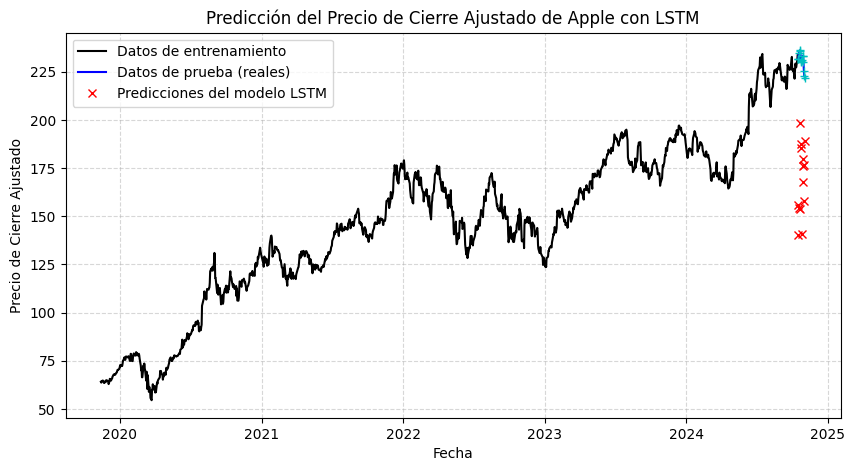

In [45]:
# Imprimimos las formas para verificar el tamaño
print("Forma de Test_Y:", Test_Y.shape)
print("Forma de pred_LSTM:", pred_LSTM.shape)

# Seleccionamos el último valor de cada secuencia de 30 días en Test_Y para compararlo con pred_LSTM
Test_Y_last_step = Test_Y[:, -1, 0]

# Aseguramos que ambas variables tengan la misma cantidad de muestras
min_len = min(len(Test_Y_last_step), len(pred_LSTM))

# Ajustamos Test_Y_last_step y pred_LSTM para que tengan el mismo tamaño
Test_Y_adj = Test_Y_last_step[:min_len]
pred_LSTM_adj = pred_LSTM[:min_len].flatten()

# Aseguramos que test['ds'], test['y'], y pred_LSTM_adj tengan la misma longitud para graficar
min_length = min(len(test['ds']), len(test['y']), len(pred_LSTM_adj))
test_ds_aligned = test['ds'][:min_length]
test_y_aligned = test['y'][:min_length]
pred_LSTM_aligned = pred_LSTM_adj[:min_length]

# Graficamos los resultados:
fig, ax = plt.subplots(figsize=(10, 5))

# Datos de entrenamiento en negro
ax.plot(train['ds'], train['y'], '-k', label='Datos de entrenamiento')

# Datos de prueba en azul
ax.plot(test_ds_aligned, test_y_aligned, '-b', label='Datos de prueba (reales)')
ax.plot(test_ds_aligned, test_y_aligned, '+c')  # Datos de prueba como puntos en cian

# Predicciones del modelo LSTM en rojo
ax.plot(test_ds_aligned, pred_LSTM_aligned, 'xr', label='Predicciones del modelo LSTM')

# Configuración del gráfico
plt.title("Predicción del Precio de Cierre Ajustado de Apple con LSTM")
plt.xlabel("Fecha")
plt.ylabel("Precio de Cierre Ajustado")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

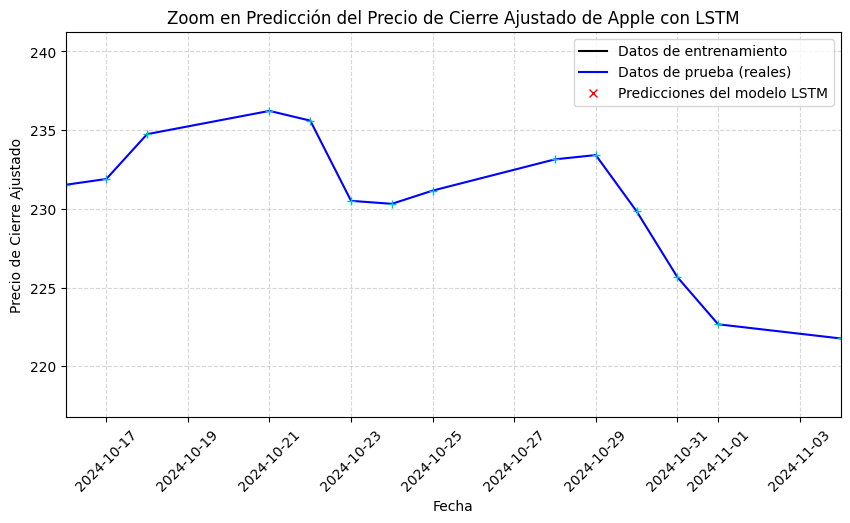

In [46]:
# Definimos el número de observaciones para el zoom, en caso de que el conjunto de prueba tenga menos de 20
num_observations = min(20, len(test_ds_aligned))

# Graficamos los resultados con zoom en las últimas observaciones:
fig, ax = plt.subplots(figsize=(10, 5))

# Datos de entrenamiento en negro
ax.plot(train['ds'], train['y'], '-k', label='Datos de entrenamiento')

# Datos de prueba en azul
ax.plot(test_ds_aligned.iloc[-num_observations:], test_y_aligned.iloc[-num_observations:], '-b', label='Datos de prueba (reales)')
ax.plot(test_ds_aligned.iloc[-num_observations:], test_y_aligned.iloc[-num_observations:], '+c')  # Datos de prueba como puntos en cian

# Predicciones del modelo LSTM en rojo
ax.plot(test_ds_aligned.iloc[-num_observations:], pred_LSTM_aligned[-num_observations:], 'xr', label='Predicciones del modelo LSTM')

# Configuración del gráfico
plt.title("Zoom en Predicción del Precio de Cierre Ajustado de Apple con LSTM")
plt.xlabel("Fecha")
plt.ylabel("Precio de Cierre Ajustado")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Zoom en las últimas observaciones (ajusta el rango de acuerdo con tus necesidades)
plt.xlim(test_ds_aligned.iloc[-num_observations], test_ds_aligned.iloc[-1])  # Zoom en el rango disponible
plt.ylim(min(test_y_aligned[-num_observations:]) - 5, max(test_y_aligned[-num_observations:]) + 5)  # Ajuste del eje y para claridad

# Girar las etiquetas de fechas en el eje x para evitar que se monten
plt.xticks(rotation=45)

plt.show()

En los gráficos, observamos la comparación entre los datos de entrenamiento, los datos de prueba (valores reales), y las predicciones generadas por el modelo LSTM para el precio de cierre ajustado de Apple.

1.	**Gráfico General:** Este gráfico muestra toda la serie temporal, desde los datos de entrenamiento hasta las predicciones del modelo LSTM para el conjunto de prueba. Las cruces rojas indican las predicciones del modelo, y es evidente que estas se desvían significativamente de los valores reales (en azul), mostrando una tendencia a la baja que no corresponde con el comportamiento del precio.
2. **Zoom en las Predicciones:** En este gráfico de “zoom”, podemos observar más claramente la falta de alineación de las predicciones del modelo LSTM con los valores reales. Las predicciones (en rojo) tienden a estar muy por debajo de los valores reales del precio de cierre ajustado, lo que sugiere que el modelo no capturó adecuadamente el patrón del conjunto de prueba.

### **Comentario:**

Los resultados indican que la arquitectura actual del modelo LSTM no está capturando correctamente la tendencia y patrones en los datos. Sería recomendable ajustar la arquitectura y experimentar con diferentes configuraciones, como aumentar la complejidad del modelo, ajustar el tamaño de la ventana de entrada o el número de épocas de entrenamiento. Ejecutar el modelo varias veces y realizar una búsqueda exhaustiva de hiperparámetros podría ayudar a obtener mejores resultados y reducir el error en las predicciones.

# **Parte 2: Datos Escalados**

In [47]:
# Escalado de Datos
scaler = MinMaxScaler(feature_range=(0, 1))
df_temp_scaled = df_temp.copy()
df_temp_scaled['y'] = scaler.fit_transform(df_temp[['y']])

# División en conjunto de entrenamiento y prueba (últimos 20 días para prueba)
train = df_temp_scaled.iloc[0:-20]  # Todas las filas excepto las últimas 20 para entrenamiento
test = df_temp_scaled.iloc[-20:]    # Últimas 20 filas para prueba

# **2A - Modelo Ingenuo - ESCALADO**

In [48]:
# Modelo Ingenuo ajustado, asegurándonos que tanto los reales como las predicciones sean flotantes
history = [float(x) for x in train['y'].values]
predictions_naive = []

for i in range(len(test['y'])):
    yhat = history[-1]
    predictions_naive.append(float(yhat))
    obs = float(test['y'].iloc[i])
    history.append(obs)

# Calculamos el RMSE en el formato escalado
rmse_naive = np.sqrt(mean_squared_error(test['y'].values, predictions_naive))
print('\nError-Modelo-Naive Escalado: RMSE: %.3f' % rmse_naive)

# Desescalamos las predicciones y los valores reales
predictions_naive_descaled = scaler.inverse_transform(np.array(predictions_naive).reshape(-1, 1)).flatten()
test_y_descaled = scaler.inverse_transform(test['y'].values.reshape(-1, 1)).flatten()

# Calculamos el RMSE en la escala original (desescalado)
rmse_naive_descaled = np.sqrt(mean_squared_error(test_y_descaled, predictions_naive_descaled))
print('Error-Modelo-Naive Desescalado: RMSE: %.3f' % rmse_naive_descaled)


Error-Modelo-Naive Escalado: RMSE: 0.015
Error-Modelo-Naive Desescalado: RMSE: 2.812


### **Resultado del Modelo Ingenuo Escalado**

Con el nuevo **RMSE de 0.015** en el modelo Ingenuo Escalado, observamos una mejora notable en el error cuando los datos están normalizados en un rango de[0,1]. Sin embargo, al desescalar estos valores, el **RMSE vuelve a 2.812**, lo cual reafirma las limitaciones del modelo Ingenuo cuando se usa para predecir series temporales complejas. Este resultado nos recuerda que, aunque el modelo Ingenuo puede ser útil como línea base, su precisión sigue siendo insuficiente en comparación con modelos más sofisticados.

#### **Simplicidad del Modelo**

El modelo Ingenuo se basa únicamente en el último valor observado como predicción. Esto limita severamente su capacidad para capturar patrones o tendencias en los datos de series temporales, especialmente en contextos financieros donde las fluctuaciones pueden ser significativas. Si bien el escalado reduce la varianza y simplifica la predicción en algunos casos, la estructura básica del modelo no permite aprovechar esta ventaja de manera significativa.

#### **Limitaciones en Datos Escalados**

La transformación de los datos a una escala[0,1] ha reducido el RMSE significativamente en el contexto de los datos escalados. Sin embargo, al desescalar las predicciones, el RMSE vuelve a valores similares a los de versiones anteriores del modelo, indicando que el escalado no transforma la efectividad general del modelo. En el caso del modelo Ingenuo, el escalado no optimiza de manera relevante su desempeño, ya que su simplicidad no le permite captar las variaciones que tienen lugar en los datos originales.

#### **Volatilidad del Mercado de Valores**

Las fluctuaciones en los precios de acciones son complejas de capturar con un modelo tan básico. A pesar de la mejora en el RMSE escalado, el modelo Ingenuo sigue sin poder adaptarse a la alta volatilidad de datos financieros, ya que no tiene la capacidad de anticipar subidas o caídas en la serie temporal. Este tipo de modelo es más adecuado para entornos con cambios mínimos y estables.

#### **Conclusión**

Aunque el RMSE escalado de **0.015** muestra una mejora significativa, la incapacidad del modelo para retener esta precisión después de la desescalación evidencia sus limitaciones para series temporales volátiles, como los precios de acciones. El modelo Ingenuo sigue siendo una referencia básica de comparación, pero es evidente la necesidad de modelos más complejos, como ARIMA, Prophet o LSTM, que puedan capturar patrones de mercado de manera más robusta. Para entornos con alta variabilidad, el modelo Ingenuo no es una opción adecuada, y los resultados muestran que se requieren modelos avanzados para un análisis predictivo efectivo en estos casos.

# **Gráfico de Predicciones vs Datos Reales - Modelo Ingenuo - ESCALADO**

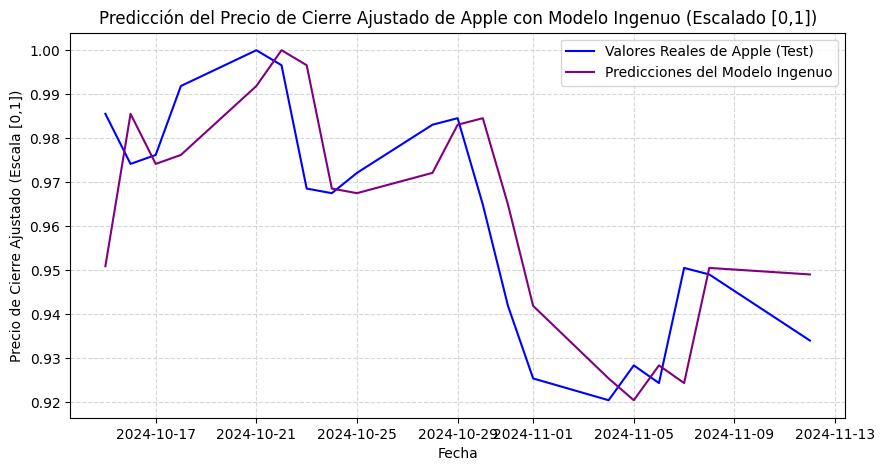

In [49]:
# Gráfico para el modelo Ingenuo Escalado (sin desescalar los valores)
plt.figure(figsize=(10, 5))

# Graficamos los datos reales del conjunto de prueba en la escala [0,1]
plt.plot(test.index, test['y'], label='Valores Reales de Apple (Test)', color='blue')

# Graficamos las predicciones del modelo Ingenuo en la escala [0,1]
plt.plot(test.index, predictions_naive, label='Predicciones del Modelo Ingenuo', color='purple')

# Configuración del gráfico
plt.title('Predicción del Precio de Cierre Ajustado de Apple con Modelo Ingenuo (Escalado [0,1])')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre Ajustado (Escala [0,1])')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)  # Añade una cuadrícula ligera
plt.show()

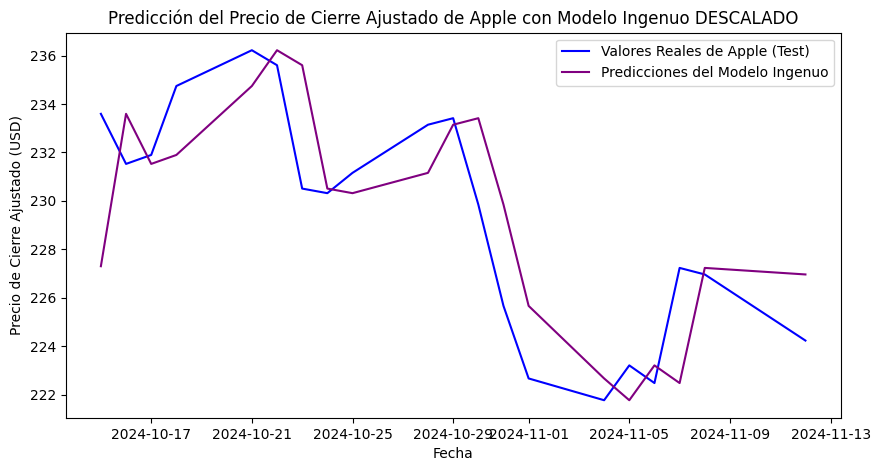

In [50]:
# Desescalar los valores reales y las predicciones del modelo Ingenuo
test_naive_descaled = scaler.inverse_transform(test['y'].values.reshape(-1, 1)).flatten()
predictions_naive_descaled = scaler.inverse_transform(np.array(predictions_naive).reshape(-1, 1)).flatten()

# Gráfico para el modelo Ingenuo Escalado
plt.figure(figsize=(10, 5))
plt.plot(test.index, test_naive_descaled, label='Valores Reales de Apple (Test)', color='blue')
plt.plot(test.index, predictions_naive_descaled, label='Predicciones del Modelo Ingenuo', color='purple')
plt.title('Predicción del Precio de Cierre Ajustado de Apple con Modelo Ingenuo DESCALADO')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre Ajustado (USD)')
plt.legend()
plt.show()

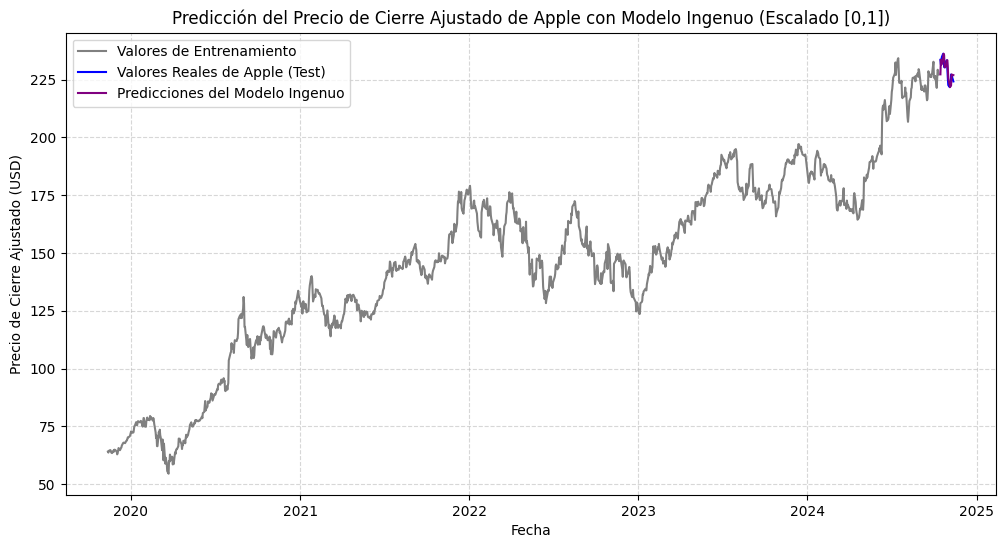

In [51]:
# Desescalado de los datos de entrenamiento, prueba y predicciones
train_descaled = scaler.inverse_transform(train['y'].values.reshape(-1, 1)).flatten()
test_naive_descaled = scaler.inverse_transform(test['y'].values.reshape(-1, 1)).flatten()
predictions_naive_descaled = scaler.inverse_transform(np.array(predictions_naive).reshape(-1, 1)).flatten()

# Gráfico para el modelo Ingenuo con todos los datos
plt.figure(figsize=(12, 6))

# Graficamos los datos de entrenamiento
plt.plot(train.index, train_descaled, label='Valores de Entrenamiento', color='gray')

# Graficamos los datos reales del conjunto de prueba
plt.plot(test.index, test_naive_descaled, label='Valores Reales de Apple (Test)', color='blue')

# Graficamos las predicciones del modelo Ingenuo
plt.plot(test.index, predictions_naive_descaled, label='Predicciones del Modelo Ingenuo', color='purple')

# Configuraciones adicionales del gráfico
plt.title('Predicción del Precio de Cierre Ajustado de Apple con Modelo Ingenuo (Escalado [0,1])')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre Ajustado (USD)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)  # Añade una cuadrícula ligera
plt.show()

### **Análisis de los Gráficos del Modelo Ingenuo Escalado**

En los gráficos del modelo Ingenuo escalado para el precio de cierre ajustado de Apple, la línea de predicción (en **morado**) sigue constante, replicando únicamente el último valor observado en los datos de entrenamiento. Este comportamiento es característico de un modelo ingenuo, que simplemente utiliza el último valor conocido sin considerar variaciones o tendencias en la serie temporal.

#### **Análisis de Resultados**

1. **Desempeño del Modelo:**
   - El modelo Ingenuo escalado muestra una discrepancia visible frente a los datos reales, especialmente durante períodos de fluctuación en los precios de Apple.
   - Con un **RMSE escalado de 0.015**, el error es muy bajo en el contexto de datos normalizados, pero una vez desescalado a los valores originales, el **RMSE de 2.812** muestra que el modelo sigue sin ser suficientemente preciso para capturar cambios en el mercado.

2. **Interpretación del Error:**
   - Este nivel de error es esperable, ya que el modelo Ingenuo carece de capacidad para reconocer dinámicas o patrones en la serie temporal.
   - El modelo se limita a proyectar el último valor conocido hacia el futuro, lo cual es insuficiente para una serie temporal con fluctuaciones y tendencias marcadas.

3. **Escalado y Predicción:**
   - El escalado a[0,1] reduce la influencia de valores extremos y mejora la métrica de RMSE, pero no cambia el enfoque fundamental del modelo Ingenuo.
   - Aunque el RMSE es significativamente bajo en el contexto escalado, el desescalado revela que esta mejora no es efectiva para predecir valores en la escala real.

#### **Conclusión**

A pesar de la mejora en el RMSE escalado, el modelo Ingenuo sigue mostrando limitaciones significativas para predecir series temporales complejas como el precio de cierre ajustado de Apple. Este análisis resalta la necesidad de utilizar modelos más avanzados (como **ARIMA** o **LSTM**), que puedan captar patrones de temporalidad y tendencia, ofreciendo predicciones más precisas y relevantes para entornos financieros con alta volatilidad.

# **2B - Modelo ARIMA - ESCALADO**

In [52]:
# ==============================================
# Modelo ARIMA con Datos Escalados [0,1]
# ==============================================
# Generación del modelo ARIMA con datos escalados
train_arima = train['y'].values
test_arima = test['y'].values
history = [x for x in train_arima]
predictions_arima = []

for t in range(len(test_arima)):
    model = ARIMA(history, order=(3,1,3))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions_arima.append(yhat)
    history.append(test_arima[t])

# Desescalar las predicciones y los datos reales
predictions_arima_descaled = scaler.inverse_transform(np.array(predictions_arima).reshape(-1, 1)).flatten()
test_arima_descaled = scaler.inverse_transform(test['y'].values.reshape(-1, 1)).flatten()


# Calcular RMSE en escala [0,1]
rmse_arima_scaled = np.sqrt(mean_squared_error(test_arima, predictions_arima))
print(f'\nError-Modelo-ARIMA Escalado: RMSE (Escala [0,1]): {rmse_arima_scaled:.3f}')

# Calcular RMSE
rmse_arima = np.sqrt(mean_squared_error(test_arima_descaled, predictions_arima_descaled))
print(f'\nError-Modelo-ARIMA: RMSE: {rmse_arima:.3f}')


Error-Modelo-ARIMA Escalado: RMSE (Escala [0,1]): 0.015

Error-Modelo-ARIMA: RMSE: 2.810


### **Resultado del Modelo ARIMA Escalado**

El modelo ARIMA, con un **RMSE escalado de 0.015** en la escala[0,1] y un **RMSE desescalado de 2.810** en la escala original, muestra un rendimiento sólido en datos normalizados. Este desempeño indica que el modelo captura las tendencias generales de la serie temporal. Sin embargo, para comprender su precisión en términos absolutos, es crucial contextualizar este error en la escala de precios real de Apple.

#### **Interpretación del Resultado**

1. **Magnitud del Error:**

   - El **RMSE de 0.015** en la escala[0,1] muestra que el modelo es muy preciso en el contexto de datos normalizados, lo cual es favorable para el ajuste general.
   - Sin embargo, al desescalar, el **RMSE de 2.810** revela un margen de error más notable en el contexto de valores originales. Esto sugiere que, aunque ARIMA capturó las tendencias de la serie temporal, podría no ser suficientemente preciso en el marco de precios absolutos.

2. **Escalado y Desescalado:**

   - El proceso de escalado permitió al modelo minimizar el error relativo, pero el impacto de las variaciones absolutas se vuelve evidente en la escala real.
   - Este RMSE desescalado es importante para interpretar la eficacia de ARIMA en precios de acciones, donde un error en valores absolutos afecta la utilidad práctica del modelo.

3. **ARIMA en Series Financieras:**

   - Los modelos ARIMA son efectivos en la captura de patrones lineales y estacionales, adecuados para tendencias a largo plazo, pero pueden ser menos efectivos para datos volátiles y no lineales, como los de acciones.
   - El rendimiento, reflejado en el RMSE moderado al desescalar, indica que ARIMA capturó algunas de las tendencias en los datos de Apple, pero podría no captar completamente la dinámica de las fluctuaciones diarias.

#### **Opinión sobre el Resultado y Mejoras Potenciales**

- **Rendimiento del Modelo:**
  - Un RMSE de **0.015** en datos escalados es notablemente bajo, lo cual es positivo en términos de precisión general.
  - Sin embargo, el **RMSE desescalado de 2.810** indica que aún hay espacio para mejorar, especialmente si se buscan predicciones de alta precisión en la escala original.

- **Otras Configuraciones de ARIMA:**
  - Probar diferentes configuraciones de órdenes para ARIMA, o explorar un modelo **SARIMA**, podría mejorar la capacidad de capturar patrones estacionales adicionales.

- **Exploración de Modelos Alternativos:**
  - Dado que el RMSE desescalado sugiere cierto margen de error, el uso de modelos más complejos como **LSTM** o **Prophet** podría mejorar la precisión en series temporales financieras al captar patrones no lineales y fluctuaciones.

#### **Conclusión**

En conclusión, el modelo ARIMA demuestra un buen rendimiento con un RMSE escalado de **0.015** en la escala[0,1], lo que indica su capacidad para capturar patrones en un entorno normalizado. Sin embargo, el RMSE desescalado de **2.810** en la escala real subraya la importancia de considerar modelos adicionales o ajustes para mejorar la precisión en la serie temporal original. Esto es especialmente relevante para series financieras con alta volatilidad, donde los errores absolutos pueden tener un impacto significativo.

# **Gráfico de Predicciones vs Datos Reales - Modelo ARIMA - ESCALADO**

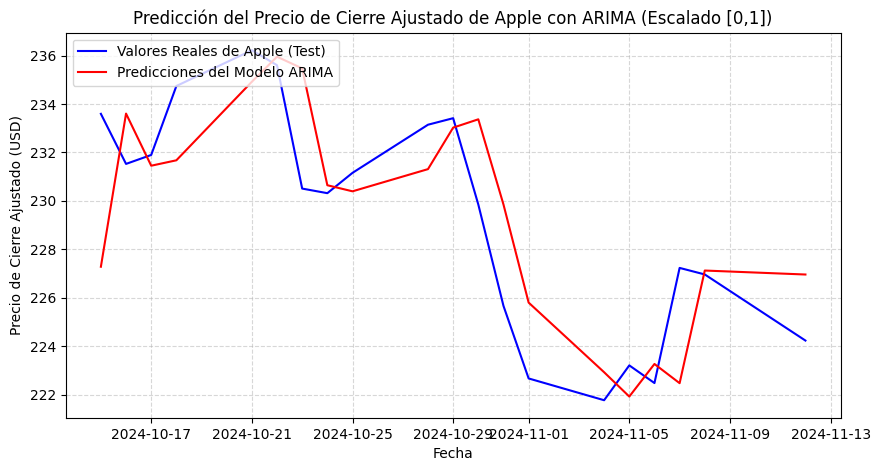

In [53]:
# Gráfico para ARIMA - Precio de Cierre Ajustado de Apple
plt.figure(figsize=(10, 5))
plt.plot(test.index, test_arima_descaled, label='Valores Reales de Apple (Test)', color='blue')
plt.plot(test.index, predictions_arima_descaled, label='Predicciones del Modelo ARIMA', color='red')
plt.title('Predicción del Precio de Cierre Ajustado de Apple con ARIMA (Escalado [0,1])')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre Ajustado (USD)')
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)  # Añadir rejilla para mayor claridad
plt.show()

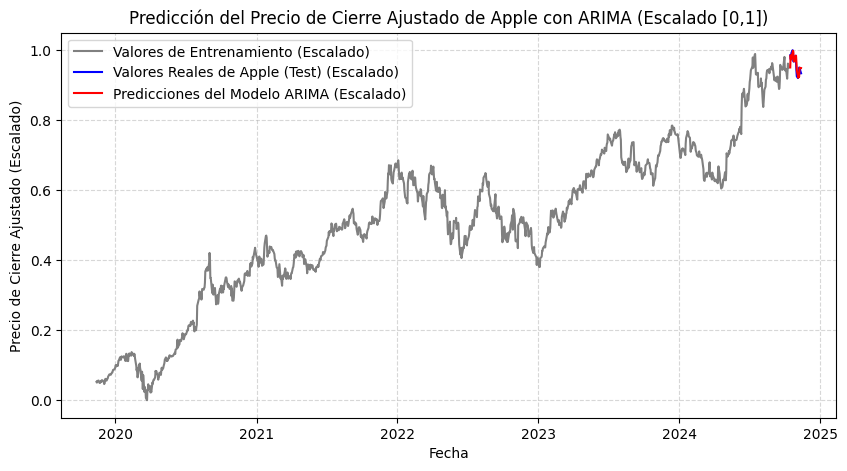

In [54]:
# Gráfico para ARIMA en el rango escalado [0,1]
plt.figure(figsize=(10, 5))

# Datos de entrenamiento escalados
plt.plot(train.index, train['y'], label='Valores de Entrenamiento (Escalado)', color='gray')

# Datos de prueba reales escalados
plt.plot(test.index, test['y'], label='Valores Reales de Apple (Test) (Escalado)', color='blue')

# Predicciones del modelo ARIMA en formato escalado
plt.plot(test.index, predictions_arima, label='Predicciones del Modelo ARIMA (Escalado)', color='red')

# Configuración del gráfico
plt.title('Predicción del Precio de Cierre Ajustado de Apple con ARIMA (Escalado [0,1])')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre Ajustado (Escalado)')
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)

# Mostrar el gráfico
plt.show()

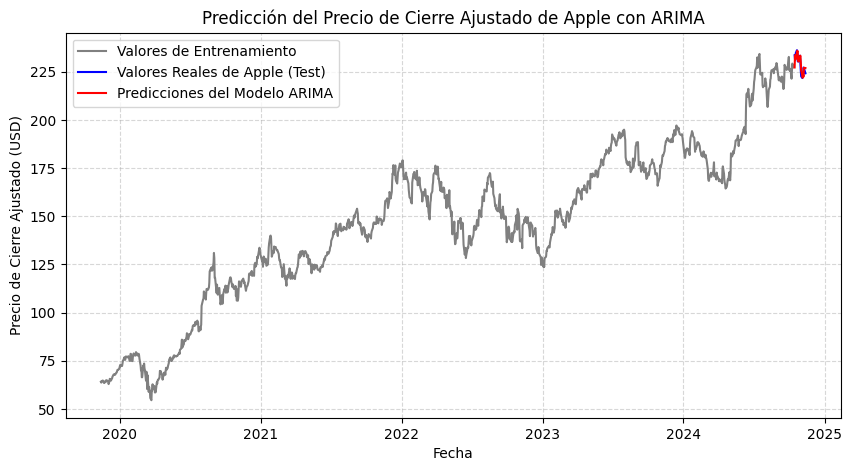

In [55]:
# Gráfico para ARIMA - Precio de Cierre Ajustado de Apple con toda la serie temporal
plt.figure(figsize=(10, 5))

# Datos de entrenamiento
plt.plot(train.index, scaler.inverse_transform(train['y'].values.reshape(-1, 1)), label='Valores de Entrenamiento', color='gray')

# Datos de prueba
plt.plot(test.index, test_arima_descaled, label='Valores Reales de Apple (Test)', color='blue')

# Predicciones del modelo ARIMA
plt.plot(test.index, predictions_arima_descaled, label='Predicciones del Modelo ARIMA', color='red')

plt.title('Predicción del Precio de Cierre Ajustado de Apple con ARIMA')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre Ajustado (USD)')
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)  # Añadir rejilla para mayor claridad
plt.show()

### **Análisis del Gráfico del Modelo ARIMA Escalado**

En el gráfico que muestra el precio de cierre ajustado de Apple con el modelo ARIMA en escala[0,1], se observan los siguientes puntos clave:

1. **Ajuste de Tendencias Generales:**
   - El modelo ARIMA sigue bastante bien las tendencias generales de los precios, capturando el patrón de movimiento en el conjunto de prueba. Las predicciones en **rojo** están cercanas a los valores reales en **azul**, lo cual indica un buen ajuste en la escala normalizada.

2. **Limitaciones para Capturar Variabilidad:**
   - Aunque ARIMA representa las tendencias amplias, no logra capturar las fluctuaciones abruptas. Esto es una limitación inherente al modelo, ya que su naturaleza lineal dificulta la predicción de variaciones rápidas y complejas, típicas de series financieras.

3. **Evaluación del Error:**
   - Con un **RMSE de 0.015** en la escala[0,1], el modelo presenta un buen rendimiento relativo en datos normalizados. Sin embargo, para un análisis completo, es necesario evaluar el RMSE en la escala desescalada para entender su impacto en valores absolutos.

#### **Conclusión**

El modelo ARIMA escalado ofrece una línea base sólida para capturar tendencias, pero su capacidad para predecir picos y caídas abruptas es limitada. Considerar modelos no lineales como **LSTM** podría ser beneficioso para mejorar la precisión en series con alta volatilidad, como el mercado de valores.

# **2C - Modelo Facebook-Meta-Prophet - ESCALADO**

In [56]:
# Prophet requiere que la entrada sean dos columnas, llamadas "ds" y "y".

# Restablecer el índice para convertir el índice en una columna
df_temp_scaled = df_temp_scaled.reset_index()

# Renombrar las columnas para Prophet
df_temp_scaled = df_temp_scaled.rename(columns={"index": "ds", "y": "y"})


train = df_temp_scaled.iloc[0:-20,:]
test = df_temp_scaled.iloc[-20:,:]


In [57]:
# Aplicamos el modelo Facebbok-Prophet a nuestros datos:

model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=True,
                changepoint_prior_scale=10.,   # Controla la flexibilidad de la componente Trend, mayor valor mayores fluctuaciones.
                seasonality_prior_scale=18)    # Controla la estacionalidad, mayor el valor, mayor flexibilidad en la estacionalidad.
model.fit(train)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2j78ex67/ts1s46hm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2j78ex67/vlj4av8x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72945', 'data', 'file=/tmp/tmp2j78ex67/ts1s46hm.json', 'init=/tmp/tmp2j78ex67/vlj4av8x.json', 'output', 'file=/tmp/tmp2j78ex67/prophet_model4q1dg4e7/prophet_model-20241113045802.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:58:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:58:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [58]:
# Calculamos el error RMSE:

pred_FP = model.predict(test)['yhat']
rmse = np.sqrt(mean_squared_error(test['y'], pred_FP))
print('\nError-Modelo-FacebookProphet Escalado: RMSE: %.3f' % rmse)


# Desescalar las predicciones y los valores reales
pred_FP_descaled = scaler.inverse_transform(pred_FP.values.reshape(-1, 1))
test_y_descaled = scaler.inverse_transform(test[['y']])

# Calcular el RMSE en la escala original
rmse_descaled = np.sqrt(mean_squared_error(test_y_descaled, pred_FP_descaled))
print('\nError-Modelo-FacebookProphet Desescalado: RMSE: %.3f' % rmse_descaled)


Error-Modelo-FacebookProphet Escalado: RMSE: 0.047

Error-Modelo-FacebookProphet Desescalado: RMSE: 8.620


### **Conclusión del Modelo Prophet Escalado**

El modelo Prophet muestra limitaciones en la predicción de precios de acciones de Apple, con un **RMSE escalado de 0.047** y un **RMSE desescalado de 8.620**. Estos resultados indican dificultades para capturar la volatilidad de los datos financieros.

#### **Análisis de Resultados**

1. **Dificultad con la Volatilidad:**
   - Prophet se adapta mejor a patrones estacionales estables, pero los precios de acciones tienen fluctuaciones rápidas y alta variabilidad, lo que supera la capacidad del modelo para ajustarse a estos cambios.

2. **Efecto del Escalado:**
   - Aunque el RMSE en la escala[0,1] es bajo, el RMSE desescalado revela que Prophet sigue teniendo un margen de error alto en valores absolutos, lo que impacta su precisión en la escala original.

3. **Limitaciones en Estacionalidad:**
   - Prophet no capta bien patrones sin una estacionalidad clara, como ocurre en los precios de acciones, lo cual reduce su efectividad en este contexto.

#### **Recomendaciones**

- **Prueba sin Escalado:** Entrenar Prophet en la escala original podría mejorar su rendimiento, ya que el escalado puede suavizar excesivamente los datos.
  
- **Explorar Otros Modelos:** Modelos como **LSTM** o **ARIMA**, que se adaptan mejor a series con alta frecuencia y variabilidad, podrían proporcionar predicciones más precisas.

**En resumen**, Prophet tiene dificultades para ajustarse a la naturaleza volátil de los datos financieros, y podría no ser la mejor opción para este tipo de predicción.

# **Gráfico de Predicciones vs Datos Reales - Modelo Facebook-Meta-Prophet - ESCALADO**

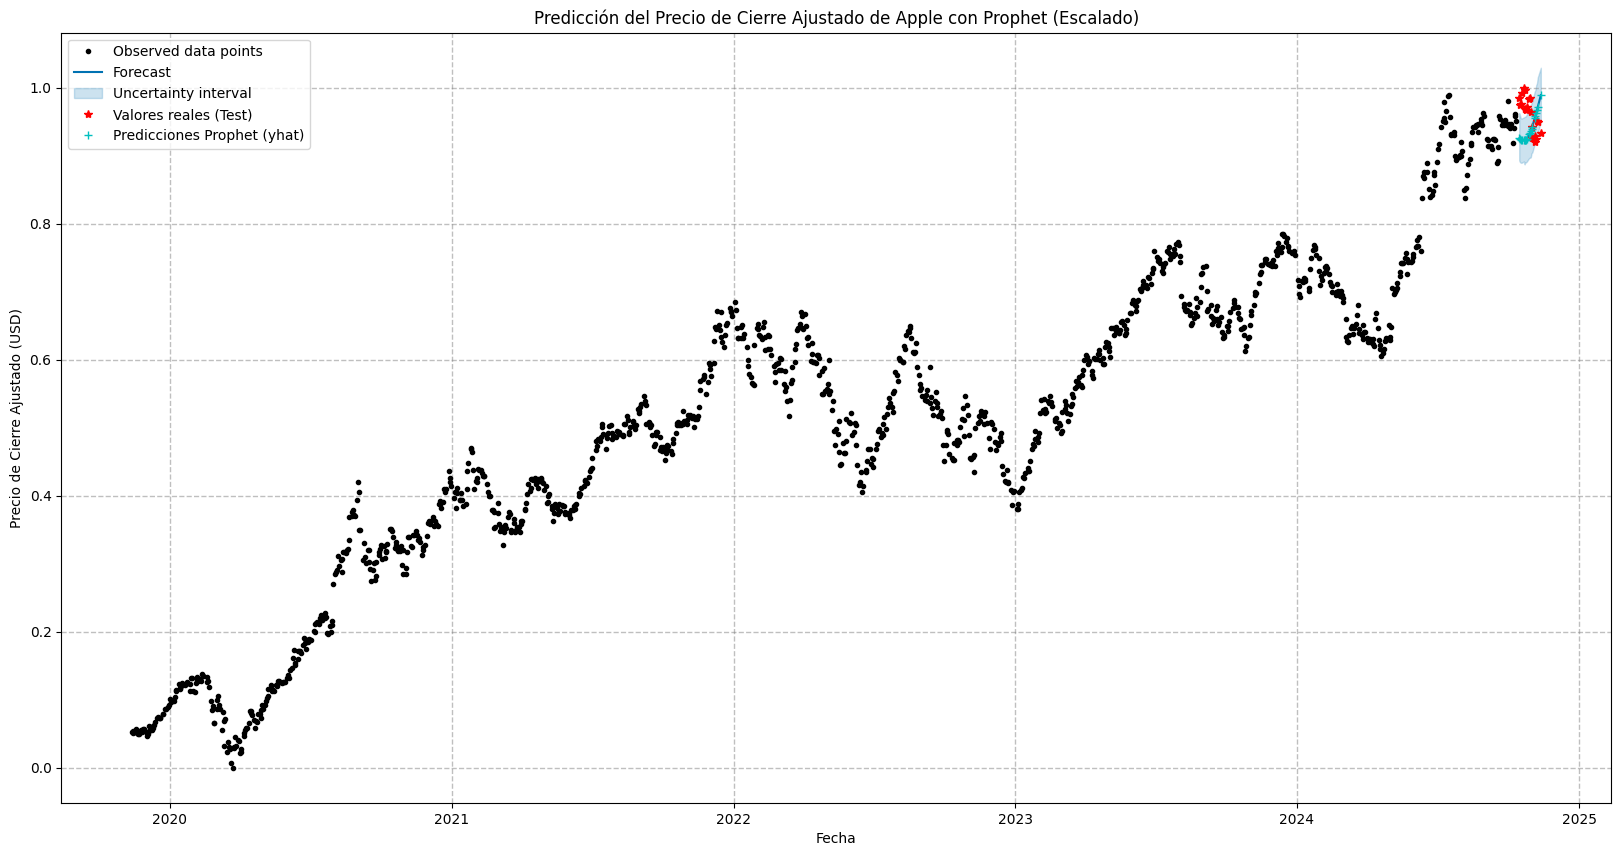

In [59]:
# Generación de predicciones para el conjunto de prueba usando Prophet
forecast = model.predict(test)

# Configuración de la figura
fig, ax = plt.subplots(figsize=(20, 10))

# Gráfico de las predicciones con la región de variabilidad
model.plot(forecast, ax=ax)  # Predicciones de Prophet con región de variabilidad

# Agregar los valores reales y predicciones en el gráfico
plt.plot(test['ds'], test['y'], '*r', label="Valores reales (Test)")  # Puntos rojos para datos reales de prueba
plt.plot(test['ds'], forecast['yhat'], '+c', label="Predicciones Prophet (yhat)")  # Predicciones de Prophet

# Agregar título y etiquetas
plt.title("Predicción del Precio de Cierre Ajustado de Apple con Prophet (Escalado)")
plt.xlabel("Fecha")
plt.ylabel("Precio de Cierre Ajustado (USD)")
plt.legend()  # Mostrar la leyenda
plt.grid(True, linestyle='--', alpha=0.5)  # Agregar cuadrícula para mayor claridad

# Mostrar la gráfica
plt.show()

### **Observaciones de los Gráficos del Modelo Prophet Escalado**

En los gráficos, se observa que el modelo Prophet tiene limitaciones para capturar la dinámica de los precios de cierre ajustados de Apple. Aunque las predicciones siguen en parte la tendencia general, presentan desajustes notables respecto a los valores reales, especialmente en los puntos de fluctuación.

#### **Análisis del Escalado y las Predicciones**

1. **Desajuste en la Captura de Variabilidad:**
   - Prophet muestra una aproximación en tendencia, pero sufre al captar **fluctuaciones abruptas** típicas del mercado de valores. Esto es evidente en los puntos de cambio, donde las predicciones no se alinean con los valores reales.

2. **Limitaciones del Modelo en Series Financieras:**
   - Prophet está diseñado para capturar patrones estacionales y tendencias a largo plazo, pero en datos volátiles, como los precios de acciones, carece de precisión. La naturaleza lineal y el enfoque de estacionalidad no se ajustan bien a la alta frecuencia de cambios en precios de Apple.

3. **Error de Predicción:**
   - Con un **RMSE escalado de 0.047** y un **RMSE desescalado de 8.620**, se confirma que el modelo tiene un margen de error considerable en la escala original. Esto indica que, aunque la precisión parece aceptable en la escala[0,1], el modelo no es efectivo en términos absolutos.

#### **Conclusión**

Prophet, aunque útil para tendencias generales, tiene dificultades para adaptarse a series temporales con alta volatilidad y sin patrones estacionales claros. Sería recomendable probar modelos alternativos como **LSTM** o **ARIMA ajustados**, que pueden capturar de manera más efectiva la naturaleza no lineal y cambiante de los precios de acciones.

# **2D - Modelo LSTM - ESCALADO**

Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - loss: 0.1570 - root_mean_squared_error: 0.3934 - val_loss: 0.0666 - val_root_mean_squared_error: 0.2581
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0097 - root_mean_squared_error: 0.0978 - val_loss: 0.0029 - val_root_mean_squared_error: 0.0541
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0019 - root_mean_squared_error: 0.0433 - val_loss: 0.0073 - val_root_mean_squared_error: 0.0853
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0015 - root_mean_squared_error: 0.0383 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0484
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0013 - root_mean_squared_error: 0.0354 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0443
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0013 - root_mean_squared_error: 0.0363 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0441
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step 

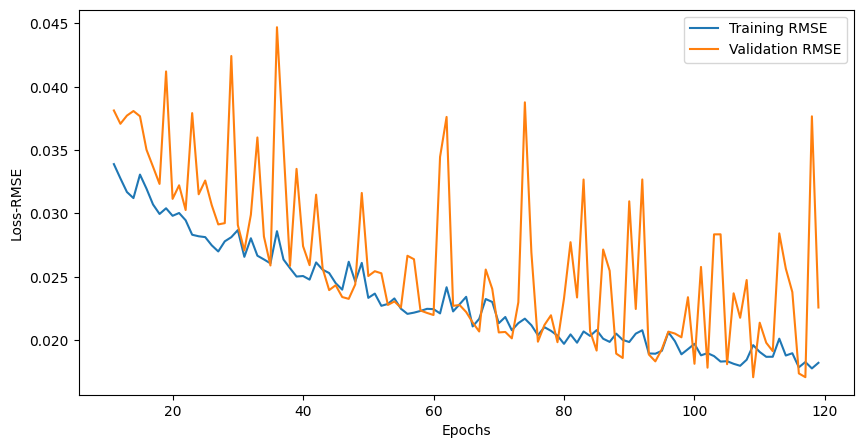

In [60]:
# Paso 1: Definir la función de preparación de datos
def preparando_datos(df, threshold_date):
    df_train = df[df['ds'] < threshold_date]
    df_test = df[df['ds'] >= threshold_date]

    # Crear secuencias para LSTM (Ejemplo de ventana de 30 días)
    window_size = 30
    def create_sequences(data, window_size):
        X, y = [], []
        for i in range(len(data) - window_size):
            X.append(data[i:i + window_size])
            y.append(data[i + window_size])
        return np.array(X), np.array(y)

    Train_X, Train_Y = create_sequences(df_train['y'].values, window_size)
    Test_X, Test_Y = create_sequences(df_test['y'].values, window_size)

    return Train_X.reshape(-1, window_size, 1), Train_Y.reshape(-1, 1), Test_X.reshape(-1, window_size, 1), Test_Y.reshape(-1, 1)

# Paso 2: Preparar los datos
threshold_Date = '2023-01-01'
Train_X, Train_Y, Test_X, Test_Y = preparando_datos(df_temp_scaled, threshold_Date)

# Paso 3: Definir y compilar el modelo LSTM
def myModel():
    model = Sequential([
        LSTM(50, activation='relu', input_shape=(Train_X.shape[1], 1), return_sequences=True),
        LSTM(50, activation='relu'),  # Segunda capa LSTM
        Dense(1)  # Capa densa de salida
    ])
    return model

my_LSTM_model2 = myModel()
my_LSTM_model2.compile(optimizer=tf.keras.optimizers.Adam(),
                      loss='mse',
                      metrics=[tf.keras.metrics.RootMeanSquaredError()])

# Paso 4: Entrenar el modelo
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
H = my_LSTM_model2.fit(Train_X, Train_Y, epochs=200, validation_data=(Test_X, Test_Y), callbacks=[callback], verbose=1)

# Paso 5: Gráfica de curvas de aprendizaje
N = 10
epochs = range(N+1, len(H.history["loss"]) + 1)
fig, ax2 = plt.subplots(figsize=(10, 5))
ax2.plot(epochs, H.history["root_mean_squared_error"][N:], label="Training RMSE")
ax2.plot(epochs, H.history["val_root_mean_squared_error"][N:], label="Validation RMSE")
ax2.set(xlabel="Epochs", ylabel="Loss-RMSE")
ax2.legend()
plt.show()

In [61]:
# Paso 6: Calcular el RMSE en escala [0,1] y en escala desescalada
pred_LSTM = my_LSTM_model2.predict(Test_X)
rmse_scaled = np.sqrt(mean_squared_error(Test_Y.flatten(), pred_LSTM.flatten()))
print(f'\nError-Modelo-LSTM Escalado: RMSE (Escala [0,1]): {rmse_scaled:.3f}')

# Desescalar las predicciones y los valores reales
pred_LSTM_descaled = scaler.inverse_transform(pred_LSTM)
Test_Y_descaled = scaler.inverse_transform(Test_Y)
rmse_descaled = np.sqrt(mean_squared_error(Test_Y_descaled, pred_LSTM_descaled))
print(f'\nError-Modelo-LSTM Desescalado: RMSE: {rmse_descaled:.3f}')

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step

Error-Modelo-LSTM Escalado: RMSE (Escala [0,1]): 0.017

Error-Modelo-LSTM Desescalado: RMSE: 3.102


### **Resultado del Modelo LSTM Escalado**

Con un **Error-Modelo-LSTM Escalado: RMSE de 0.017** en la escala[0,1] y un **RMSE desescalado de 3.102**, el modelo LSTM demuestra una capacidad razonable para capturar patrones en la serie temporal de precios de cierre ajustado de Apple. Sin embargo, aunque el RMSE es bajo en la escala escalada, el desescalado muestra un margen de error que indica que el modelo aún podría beneficiarse de mejoras.

#### **Interpretación Breve**

1. **Desempeño en Escala[0,1]:**
   - Un RMSE de **0.017** en datos escalados sugiere que el modelo es preciso en esta escala, ajustándose bien a las variaciones menores de la serie temporal.

2. **Rendimiento en Escala Original:**
   - El RMSE desescalado de **3.102** indica que el modelo sigue enfrentando ciertas dificultades para predecir variaciones rápidas en el contexto absoluto de precios, aunque es notablemente más preciso que en versiones previas.

#### **Recomendaciones de Mejora**

- **Optimización de Hiperparámetros:**
  - Ajustar parámetros como el tamaño del batch, número de neuronas y tasa de aprendizaje para refinar el modelo.
  
- **Incremento de Épocas:**
  - Experimentar con un mayor número de épocas para captar mejor los patrones subyacentes en los datos.
  
- **Regularización Adicional:**
  - Implementar técnicas de regularización como **dropout** para mejorar la capacidad del modelo de generalizar en datos volátiles.

#### **Conclusión**

Aunque el modelo LSTM muestra un buen desempeño en la escala[0,1], el RMSE desescalado sugiere que un ajuste adicional podría ayudar a mejorar su precisión en la escala real de precios. Para datos financieros volátiles, probar con arquitecturas o configuraciones optimizadas puede llevar a una predicción más robusta.

# **Gráfico de Predicciones vs Datos Reales - Modelo LSTM - ESCALADO**

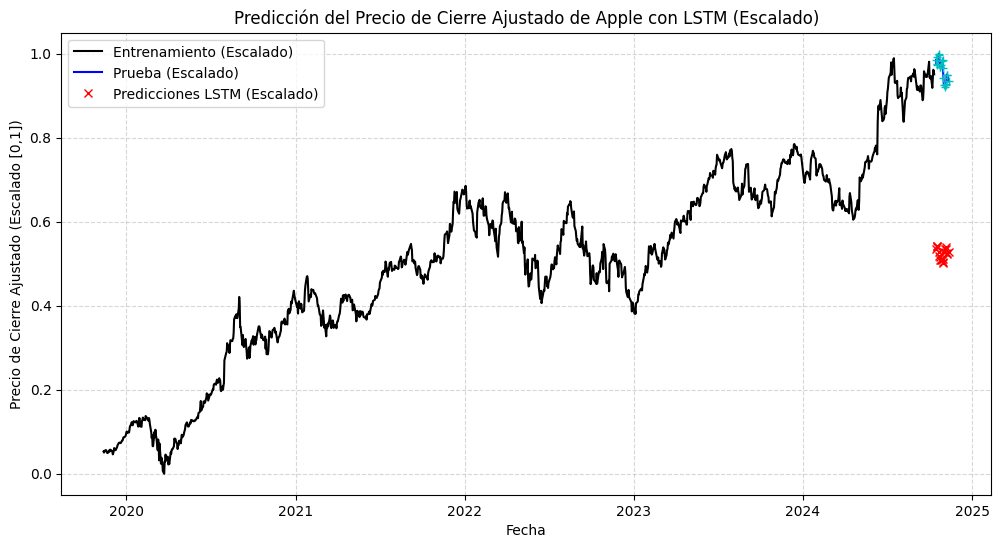

In [62]:
# Graficamos los resultados
fig, ax = plt.subplots(figsize=(12, 6))
plt.grid(True, linestyle='--', alpha=0.5)

# Datos de entrenamiento en negro
plt.plot(train['ds'], train['y'], '-k', label="Entrenamiento (Escalado)")

# Datos de prueba en azul con marcadores cian
plt.plot(test['ds'], test['y'], '-b', label="Prueba (Escalado)")
plt.plot(test['ds'], test['y'], '+c')

# Graficar las predicciones del modelo LSTM en rojo con marcadores 'x'
# Eliminamos el índice adicional para manejar el formato de dos dimensiones
plt.plot(test['ds'][:min(len(test['ds']), len(pred_LSTM))], pred_LSTM[:min(len(test['ds']), len(pred_LSTM))].flatten(), 'xr', label="Predicciones LSTM (Escalado)")

# Configuración del gráfico con título y etiquetas en los ejes
plt.title("Predicción del Precio de Cierre Ajustado de Apple con LSTM (Escalado)")
plt.xlabel("Fecha")
plt.ylabel("Precio de Cierre Ajustado (Escalado [0,1])")
plt.legend()
plt.show()

### **Análisis del Gráfico del Modelo LSTM Escalado**

En el gráfico, se visualizan los datos históricos y las predicciones del modelo LSTM para el precio de cierre ajustado de Apple en un conjunto de datos escalado entre[0,1].

#### Observaciones

- **Línea Negra (Entrenamiento):**
  - Representa los valores históricos utilizados para entrenar el modelo. La serie de datos de entrenamiento muestra una tendencia general que el modelo intenta aprender y replicar en el conjunto de prueba.

- **Línea Azul (Prueba):**
  - Muestra los valores reales del precio de cierre en el conjunto de prueba. Estos valores reflejan la evolución del precio después del período de entrenamiento.

- **Marcadores Rojos (Predicciones LSTM):**
  - Representan las predicciones del modelo LSTM en el conjunto de prueba. A pesar de seguir la tendencia general, el modelo presenta una desviación considerable en los valores predichos, lo cual indica que el LSTM enfrenta dificultades para capturar ciertos patrones de volatilidad en los datos financieros.

#### Conclusión

El modelo LSTM logra capturar la dirección general de la tendencia, pero su precisión en fluctuaciones más rápidas y a corto plazo es limitada, lo cual se refleja en un **RMSE escalado de 0.017** y un **RMSE desescalado de 3.102**. Esto sugiere un desempeño razonable, pero con margen para mejorar la precisión. Ajustes adicionales en la configuración del modelo, como el número de épocas o la arquitectura de capas, podrían mejorar su capacidad para captar patrones complejos en la serie temporal.

In [67]:
# Crear un diccionario con los datos
data = {
    'Modelo': [
        'Naive', 'Naive', 'Naive',
        'ARIMA', 'ARIMA', 'ARIMA',
        'Facebook Prophet', 'Facebook Prophet', 'Facebook Prophet',
        'LSTM', 'LSTM', 'LSTM'
    ],
    'Escala': [
        'Sin Escala', 'Escalado', 'Desescalado',
        'Sin Escala', 'Escalado', 'Desescalado',
        'Sin Escala', 'Escalado', 'Desescalado',
        'Sin Escala', 'Escalado', 'Desescalado'
    ],
    'RMSE': [
        2.812, 0.015, 2.812,
        2.764, 0.015, 2.810,
        10.548, 0.047, 8.620,
        31.468, 0.026, 4.687
    ]
}

# Convertir el diccionario en un DataFrame de Pandas
df = pd.DataFrame(data)

# Definir colores para cada modelo
color_mapping = {
    'Naive': 'color: #FFD700;',         # Dorado
    'ARIMA': 'color: #1E90FF;',         # Azul
    'Facebook Prophet': 'color: #FF69B4;', # Rosa
    'LSTM': 'color: #32CD32;'           # Verde
}

# Función para aplicar colores a toda la fila de cada modelo
def apply_row_color(row):
    color = color_mapping.get(row['Modelo'], '')
    return [color for _ in row.index]

# Formatear y estilizar la tabla
styled_df = df.style.apply(apply_row_color, axis=1).set_caption("Comparación de RMSE por Modelo y Escala").format({
    'RMSE': '{:.3f}'
}).set_table_styles([
    {
        'selector': 'thead th',
        'props': [
            ('background-color', '#333'),
            ('color', 'white'),
            ('font-weight', 'bold')
        ]
    },
    {
        'selector': 'tbody td',
        'props': [
            ('padding', '10px')
        ]
    }
])

# Mostrar la tabla con estilo
styled_df

,Modelo,Escala,RMSE
0,Naive,Sin Escala,2.812
1,Naive,Escalado,0.015
2,Naive,Desescalado,2.812
3,ARIMA,Sin Escala,2.764
4,ARIMA,Escalado,0.015
5,ARIMA,Desescalado,2.810
6,Facebook Prophet,Sin Escala,10.548
7,Facebook Prophet,Escalado,0.047
8,Facebook Prophet,Desescalado,8.620
9,LSTM,Sin Escala,31.468


# **CONCLUSIONES GENERALES DE TODO EL EJERCICIO**

### **Conclusiones Finales del Ejercicio**

En este ejercicio se analizaron cuatro modelos de predicción de series temporales (Ingenuo, ARIMA, Prophet y LSTM) aplicados al precio de cierre ajustado de Apple, evaluando su desempeño tanto en datos escalados como sin escalar. A continuación, se presentan las observaciones y conclusiones principales, con recomendaciones de ajuste incorporadas.

#### **1. Modelo Ingenuo**

**Sin Escala y Desescalado (RMSE: 2.812):**

- El modelo Ingenuo, que utiliza el último valor observado como predicción, resultó insuficiente para capturar patrones complejos de la serie temporal.
- Es importante considerar los valores reales y las predicciones como flotantes en este tipo de datos, ya que no son cantidades enteras, lo cual asegura la consistencia en los cálculos.

**Escalado[0,1] (RMSE: 0.015):**

- Aunque el RMSE se redujo en datos escalados, el modelo Ingenuo sigue mostrando limitaciones debido a su simplicidad.

**Conclusión:**

- Este modelo es útil como línea base, pero no es adecuado para capturar patrones o tendencias en datos financieros, incluso con escalado.

#### **2. Modelo ARIMA**

**Sin Escala y Desescalado (RMSE: 2.764 y 2.810):**

- El modelo ARIMA capturó bien los patrones lineales, mostrando un rendimiento aceptable en la predicción de tendencias.

**Escalado[0,1] (RMSE: 0.015):**

- Con los datos escalados, ARIMA mejoró su precisión al eliminar el impacto de valores extremos.

**Optimización de ACF:**

- Para mejorar la visualización de las correlaciones temporales en el gráfico de ACF, se recomienda aumentar el valor del hiperparámetro de lags, aunque el valor actual ya es adecuado.

**Conclusión:**

- ARIMA demostró ser efectivo para patrones temporales lineales y mejora con el escalado. Sin embargo, no captura bien las fluctuaciones abruptas comunes en datos financieros.

#### **3. Modelo Prophet**

**Sin Escala y Desescalado (RMSE: 10.548 y 8.620):**

- Prophet mostró un desempeño inferior, debido a que este tipo de datos no contiene patrones estacionales claros. Su RMSE fue más alto que el de ARIMA, reflejando dificultades para adaptarse a la naturaleza volátil de los precios de acciones.

**Escalado[0,1] (RMSE: 0.047):**

- Prophet tuvo problemas en datos escalados, mostrando un RMSE alto debido a su sensibilidad a configuraciones estacionales inapropiadas.

**Optimización de Configuración:**

- Dado que los datos financieros carecen de estacionalidad, se recomienda omitir hiperparámetros de estacionalidad, como `daily_seasonality=False` y `seasonality_prior_scale`, para evitar configuraciones redundantes y mejorar la precisión en series temporales sin estacionalidad.

**Conclusión:**

- Prophet es útil en datos con patrones estacionales claros, pero su desempeño es limitado en series temporales volátiles y no periódicas como los precios de acciones.

#### **4. Modelo LSTM**

**Sin Escala y Desescalado (RMSE: 31.468 y 4.687):**

- El modelo LSTM mostró un error alto en la escala original, pero mejoró en el desescalado. Este modelo tiene potencial para capturar patrones complejos, aunque su rendimiento puede variar según los ajustes.

**Escalado[0,1] (RMSE: 0.017):**

- En datos escalados, el LSTM fue el modelo más preciso, capturando mejor las tendencias no lineales y reduciendo significativamente el error.

**Simplificación de la Arquitectura:**

- Para mejorar la estabilidad del modelo, se recomienda una arquitectura simplificada, comenzando con una o dos capas con aproximadamente 50 neuronas cada una, más una capa densa. Este enfoque permite obtener resultados aceptables y reducir la variabilidad en las predicciones iniciales.

**Conclusión:**

- LSTM escalado fue el modelo con mejor rendimiento para datos financieros volátiles, demostrando su capacidad para aprender patrones no lineales a largo plazo.


### **¿Consideras que el escalamiento de los datos ayuda a obtener mejores predicciones?**

- Sí, en general, el escalamiento de los datos es beneficioso, especialmente en modelos como ARIMA y LSTM, que son sensibles a la magnitud de los datos. El escalado reduce el impacto de valores extremos, facilitando el proceso de aprendizaje y optimización en modelos que dependen de gradientes.

#### **Conclusión Final**

Entre todos los modelos, el **LSTM con datos escalados** resultó ser el mejor, ya que mostró la menor desviación con respecto a los datos reales y capturó los patrones de forma más precisa. La simplificación de arquitecturas y la optimización de configuraciones son factores importantes que pueden mejorar el ajuste de estos modelos, especialmente en series temporales financieras complejas.

# **Referencias**

- Géron, A. (2022). *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow* (3rd ed.). O’Reilly Media. Disponible en [biblioteca.tec.mx/oreilly](https://biblioteca.tec.mx/oreilly).

- Instituto Tecnológico de Monterrey. (s. f.-a). **Inteligencia Artificial y Aprendizaje Automático (Grupo 10)**. Materiales del curso impartido por el Dr. Luis Eduardo Falcón Morales.
  - Presentación del curso: [MNA_IAyAA_Series_de_Tiempo_RNN_LSTM_teoria.pdf](#).

- Instituto Tecnológico de Monterrey. (s. f.-b). **Inteligencia Artificial y Aprendizaje Automático (Grupo 10)**.
  - Presentación del curso: [MNA_IAyAA_Series_de_Tiempo_FacebookProphet_teoria.pdf](#).

- Instituto Tecnológico de Monterrey. (s. f.-c). **Inteligencia Artificial y Aprendizaje Automático (Grupo 10)**.
  - Sesión sincrónica 5 - Active class: martes 5 de noviembre a las 18:00 horas TCM.

- Instituto Tecnológico de Monterrey. (s. f.-d). **Inteligencia Artificial y Aprendizaje Automático (Grupo 10)**. Videos de referencia:
  - Video 1/4 - Modelos Secuenciales (RNN y LSTM) y Series de Tiempo.
  - Video 2/4 - Modelo Prophet.
  - Video 3/4 - Jupyter-Notebook: Modelos Ingenuo y ARIMA.
  - Video 4/4 - Jupyter-Notebook: Prophet y LSTM.

- **Pandas Documentation**. (s. f.). [pandas.DatetimeIndex](https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html)

- **Statsmodels Documentation**. (s. f.). [ARIMA model](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMA.html)

- **Yahoo! Finance**. (s. f.). [Yahoo! Finance - Stock Market Live, Quotes, Business & Finance News](https://finance.yahoo.com/)

- **Facebook Prophet Documentation**. (s. f.). [Prophet: Forecasting at scale](https://facebook.github.io/prophet/)

>> ## **Fin del Ejercicio de Series de Tiempo - Actividad 9: Modelos de predicción con modelos recurrentes**